# Loading

In [ ]:
!pip install matplotlib==3.5
import matplotlib

In [ ]:
!pip install scanpy
!pip install git+https://github.com/colomemaria/epiScanpy
!pip install matplotlib
import anndata
import networkx as nx
import scanpy as sc
#import scglue
from matplotlib import rcParams
import pandas as pd
import numpy as np
import episcanpy.api as epi

  Cloning https://github.com/colomemaria/epiScanpy to /tmp/pip-req-build-j27aunx8
  Running command git clone -q https://github.com/colomemaria/epiScanpy /tmp/pip-req-build-j27aunx8
     |████████████████████████████████| 184 kB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.0 MB 35.0 MB/s 
  Created wheel for episcanpy: filename=episcanpy-0.3.2+26.g3eb7ef9-py3-none-any.whl size=126658 sha256=e8a6ad7af437b64913c1e9aa1091e6f4665f3e5bc1c822a7e41ef7f2c4cbab30
  Stored in directory: /tmp/pip-ephem-wheel-cache-jhvnk32q/wheels/f4/e0/c6/ee06e5be517fed7737b71747ff696c74ef673bdfd3d8d35bd7
  Created wheel for bamnostic: filename=bamnostic-1.1.8-py3-none-any.whl size=178415 sha256=869fa693edb29a460fb78412c05dbc20cace64a6e723048794cd9540218bdeef
  Stored in directory: /root/.cache/pip/wheels/14/c1/83/8e29a56af1c1bb5c72fe2e8420d9a72b2326a59fc6d96c5628
Successfully built

In [ ]:
!pip install matplolib==3.5
import matplotlib

ERROR: Could not find a version that satisfies the requirement matplolib==3.5 (from versions: none)
ERROR: No matching distribution found for matplolib==3.5


In [ ]:
pair = pd.read_csv('/content/drive/MyDrive/MI/new_pair.csv')
pair.drop(['Unnamed: 0'],axis=1,inplace=True)
pair.head()

,scRNA,scATAC,sample
0,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,cell_0
1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,cell_1
2,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,cell_2
3,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,cell_3
4,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,cell_4


In [ ]:
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_MI3.h5ad")
rna_obs = rna.obs

In [ ]:
atac = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_MI3.h5ad")
atac_obs = atac.obs

In [ ]:
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq.h5ad")
scRNA_seq = rna[rna_obs.index]
scRNA_seq.obs = rna_obs
scRNA_seq

AnnData object with n_obs × n_vars = 9207 × 27998
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'domain', 'leiden_anno', 'CellTypes', 'delli', 'sample'

In [ ]:
atac = anndata.read_h5ad("/content/drive/MyDrive/MI/GSE153479_atac.h5ad")
scATAC_seq = atac[atac_obs.index]
scATAC_seq.obs = atac_obs
scATAC_seq

AnnData object with n_obs × n_vars = 9207 × 118256
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features', 'delli', 'sample', 'CellTypes', 'domain'
    uns: 'omic'

# DataBase Process

## Promoter

In [ ]:
!wget http://ftp.ensembl.org/pub/release-106/gtf/mus_musculus/Mus_musculus.GRCm39.106.chr.gtf.gz

--2022-04-23 05:49:49--  http://ftp.ensembl.org/pub/release-106/gtf/mus_musculus/Mus_musculus.GRCm39.106.chr.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31324691 (30M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.106.chr.gtf.gz’

Mus_musculus.GRCm39 100%[===================>]  29.87M  1.28MB/s    in 24s     

2022-04-23 05:50:14 (1.22 MB/s) - ‘Mus_musculus.GRCm39.106.chr.gtf.gz’ saved [31324691/31324691]



In [ ]:
!gunzip Mus_musculus.GRCm39.106.chr.gtf

In [ ]:
#reference : https://zhuanlan.zhihu.com/p/439168788
!sed 's/"/\t/g' /content/Mus_musculus.GRCm39.106.chr.gtf | awk 'BEGIN{OFS=FS="\t"}{if($3=="gene") {if($7=="+") {start=$4-1000; end=$4+500;} else {if($7=="-") start=$5-500; end=$5+1000; } if(start<0) start=0; print $1,start,end,$14,$10,$7;}}' >GRCm39.promoter.bed

In [ ]:
import pandas as pd 

In [ ]:
Promoter = pd.read_csv('/content/GRCm39.promoter.bed',sep='\t')
Promoter

,1,150955201,150956701,Gm37671,ENSMUSG00000102628,+
0,1,150982666,150984166,Gm19087,ENSMUSG00000100595,+
1,1,151011258,151012758,Gm8941,ENSMUSG00000097426,+
2,1,108343807,108345307,Gm38212,ENSMUSG00000104478,+
3,1,6979784,6981284,Gm7449,ENSMUSG00000104385,+
4,1,75372507,75374007,Gm15178,ENSMUSG00000086053,-
...,...,...,...,...,...,...
55351,MT,13570,15070,mt-Nd6,ENSMUSG00000064368,-
55352,MT,13639,15139,mt-Te,ENSMUSG00000064369,-
55353,MT,13145,14645,mt-Cytb,ENSMUSG00000064370,+
55354,MT,14289,15789,mt-Tt,ENSMUSG00000064371,+


In [ ]:
Promoter.columns=['chr','chromStart','chromEnd','Gene','Gene_ID','+']

In [ ]:
Promoter = Promoter[Promoter.chr!='MT']

In [ ]:
Promoter.chromEnd.astype(int)
Promoter.chromStart.astype(int)
Promoter.chr.astype(str)

0         1
1         1
2         1
3         1
4         1
         ..
55314    19
55315    19
55316    19
55317    19
55318    19
Name: chr, Length: 55319, dtype: object

In [ ]:
Promoter['list']=''
Promoter

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,chr,chromStart,chromEnd,Gene,Gene_ID,+,list
0,1,150982666,150984166,Gm19087,ENSMUSG00000100595,+,
1,1,151011258,151012758,Gm8941,ENSMUSG00000097426,+,
2,1,108343807,108345307,Gm38212,ENSMUSG00000104478,+,
3,1,6979784,6981284,Gm7449,ENSMUSG00000104385,+,
4,1,75372507,75374007,Gm15178,ENSMUSG00000086053,-,
...,...,...,...,...,...,...,...
55314,19,4805525,4807025,Rbm4b,ENSMUSG00000033760,+,
55315,19,4814699,4816199,Gm37206,ENSMUSG00000103651,-,
55316,19,4843429,4844929,Rbm4,ENSMUSG00000094936,-,
55317,19,56449072,56450572,Plekhs1,ENSMUSG00000035818,+,


In [ ]:
for i in range(len(Promoter.index)):
  Promoter.list.iloc[i] = 'chr'+str(Promoter.chr.iloc[i])+'_'+str(Promoter.chromStart.iloc[i])+'_'+str(Promoter.chromEnd.iloc[i])
Promoter

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,chr,chromStart,chromEnd,Gene,Gene_ID,+,list
0,1,150982666,150984166,Gm19087,ENSMUSG00000100595,+,chr1_150982666_150984166
1,1,151011258,151012758,Gm8941,ENSMUSG00000097426,+,chr1_151011258_151012758
2,1,108343807,108345307,Gm38212,ENSMUSG00000104478,+,chr1_108343807_108345307
3,1,6979784,6981284,Gm7449,ENSMUSG00000104385,+,chr1_6979784_6981284
4,1,75372507,75374007,Gm15178,ENSMUSG00000086053,-,chr1_75372507_75374007
...,...,...,...,...,...,...,...
55314,19,4805525,4807025,Rbm4b,ENSMUSG00000033760,+,chr19_4805525_4807025
55315,19,4814699,4816199,Gm37206,ENSMUSG00000103651,-,chr19_4814699_4816199
55316,19,4843429,4844929,Rbm4,ENSMUSG00000094936,-,chr19_4843429_4844929
55317,19,56449072,56450572,Plekhs1,ENSMUSG00000035818,+,chr19_56449072_56450572


In [ ]:
Promoter = Promoter.set_index(['list'])
Promoter

,chr,chromStart,chromEnd,Gene,Gene_ID,+
list,,,,,,
chr1_150982666_150984166,1,150982666,150984166,Gm19087,ENSMUSG00000100595,+
chr1_151011258_151012758,1,151011258,151012758,Gm8941,ENSMUSG00000097426,+
chr1_108343807_108345307,1,108343807,108345307,Gm38212,ENSMUSG00000104478,+
chr1_6979784_6981284,1,6979784,6981284,Gm7449,ENSMUSG00000104385,+
chr1_75372507_75374007,1,75372507,75374007,Gm15178,ENSMUSG00000086053,-
...,...,...,...,...,...,...
chr19_4805525_4807025,19,4805525,4807025,Rbm4b,ENSMUSG00000033760,+
chr19_4814699_4816199,19,4814699,4816199,Gm37206,ENSMUSG00000103651,-
chr19_4843429_4844929,19,4843429,4844929,Rbm4,ENSMUSG00000094936,-


In [ ]:
chr	= {'chr1_','chr2_','chr3_','chr4_','chr5_','chr6_','chr7_','chr8_','chr9_','chr10_','chr11_','chr12_','chr13_','chr14_','chr15_','chr16_','chr17_','chr18_','chr19_','chr20_','chr21_','chr22_','chrX_','chrY_'}
chr

{'chr10_',
 'chr11_',
 'chr12_',
 'chr13_',
 'chr14_',
 'chr15_',
 'chr16_',
 'chr17_',
 'chr18_',
 'chr19_',
 'chr1_',
 'chr20_',
 'chr21_',
 'chr22_',
 'chr2_',
 'chr3_',
 'chr4_',
 'chr5_',
 'chr6_',
 'chr7_',
 'chr8_',
 'chr9_',
 'chrX_',
 'chrY_'}

In [ ]:
for i in range(len(Promoter.chr)):
  if (Promoter.chr.iloc[i]=='1'):
    Promoter.chr.iloc[i] = 'chr1_'
  if (Promoter.chr.iloc[i]=='2'):
    Promoter.chr.iloc[i] = 'chr2_'
  if (Promoter.chr.iloc[i]=='3'):
    Promoter.chr.iloc[i] = 'chr3_'
  if (Promoter.chr.iloc[i]=='4'):
    Promoter.chr.iloc[i] = 'chr4_'
  if (Promoter.chr.iloc[i]=='5'):
    Promoter.chr.iloc[i] = 'chr5_'
  if (Promoter.chr.iloc[i]=='6'):
    Promoter.chr.iloc[i] = 'chr6_'
  if (Promoter.chr.iloc[i]=='7'):
    Promoter.chr.iloc[i] = 'chr7_'
  if (Promoter.chr.iloc[i]=='8'):
    Promoter.chr.iloc[i] = 'chr8_'
  if (Promoter.chr.iloc[i]=='9'):
    Promoter.chr.iloc[i] = 'chr9_'
  if (Promoter.chr.iloc[i]=='10'):
    Promoter.chr.iloc[i] = 'chr10_'
  if (Promoter.chr.iloc[i]=='11'):
    Promoter.chr.iloc[i] = 'chr11_'
  if (Promoter.chr.iloc[i]=='12'):
    Promoter.chr.iloc[i] = 'chr12_'
  if (Promoter.chr.iloc[i]=='13'):
    Promoter.chr.iloc[i] = 'chr13_'
  if (Promoter.chr.iloc[i]=='14'):
    Promoter.chr.iloc[i] = 'chr14_'
  if (Promoter.chr.iloc[i]=='15'):
    Promoter.chr.iloc[i] = 'chr15_'
  if (Promoter.chr.iloc[i]=='16'):
    Promoter.chr.iloc[i] = 'chr16_'
  if (Promoter.chr.iloc[i]=='17'):
    Promoter.chr.iloc[i] = 'chr17_'
  if (Promoter.chr.iloc[i]=='18'):
    Promoter.chr.iloc[i] = 'chr18_'
  if (Promoter.chr.iloc[i]=='19'):
    Promoter.chr.iloc[i] = 'chr19_'
  if (Promoter.chr.iloc[i]=='X'):
    Promoter.chr.iloc[i] = 'chrX_'
  if (Promoter.chr.iloc[i]=='Y'):
    Promoter.chr.iloc[i] = 'chrY_'

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
scATAC_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_MOFA.h5ad")
scATAC_seq

AnnData object with n_obs × n_vars = 9207 × 50012
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features', 'delli', 'sample', 'CellTypes', 'domain', 'cell_type'
    var: 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'neighbors', 'omic', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary'
    obsp: 'connectivities', 'distances'

In [ ]:
scATAC_seq.var['list']=''
scATAC_seq.var['list']=scATAC_seq.var.index
scATAC_seq.var

,transcript_annotation,n_cells,commonness,prop_shared_cells,variability_score,list
chr1_3119499_3120751,intergenic,1124.0,1124.0,0.122081,0.622081,chr1_3119499_3120751
chr1_3121254_3121794,intergenic,523.0,523.0,0.056805,0.556805,chr1_3121254_3121794
chr1_3670570_3672308,Xkr4,1598.0,1598.0,0.173564,0.673564,chr1_3670570_3672308
chr1_4077274_4077869,Rp1,532.0,532.0,0.057782,0.557782,chr1_4077274_4077869
chr1_4426777_4427710,intergenic,879.0,879.0,0.095471,0.595471,chr1_4426777_4427710
...,...,...,...,...,...,...
chrY_1286363_1286873,Ddx3y,538.0,538.0,0.058434,0.558434,chrY_1286363_1286873
chrY_90737701_90745045,intergenic,7717.0,7717.0,0.838167,0.661833,chrY_90737701_90745045
chrY_90804544_90805894,Gm47283,1120.0,1120.0,0.121647,0.621647,chrY_90804544_90805894
chrY_90807185_90809589,Gm47283,2435.0,2435.0,0.264473,0.764473,chrY_90807185_90809589


In [ ]:
scATAC_seq.var['chr']=''
scATAC_seq.var['chromStart']=''
scATAC_seq.var['chromEnd']=''
scATAC_seq.var

,transcript_annotation,n_cells,commonness,prop_shared_cells,variability_score,list,chr,chromStart,chromEnd
chr1_3119499_3120751,intergenic,1124.0,1124.0,0.122081,0.622081,chr1_3119499_3120751,,,
chr1_3121254_3121794,intergenic,523.0,523.0,0.056805,0.556805,chr1_3121254_3121794,,,
chr1_3670570_3672308,Xkr4,1598.0,1598.0,0.173564,0.673564,chr1_3670570_3672308,,,
chr1_4077274_4077869,Rp1,532.0,532.0,0.057782,0.557782,chr1_4077274_4077869,,,
chr1_4426777_4427710,intergenic,879.0,879.0,0.095471,0.595471,chr1_4426777_4427710,,,
...,...,...,...,...,...,...,...,...,...
chrY_1286363_1286873,Ddx3y,538.0,538.0,0.058434,0.558434,chrY_1286363_1286873,,,
chrY_90737701_90745045,intergenic,7717.0,7717.0,0.838167,0.661833,chrY_90737701_90745045,,,
chrY_90804544_90805894,Gm47283,1120.0,1120.0,0.121647,0.621647,chrY_90804544_90805894,,,
chrY_90807185_90809589,Gm47283,2435.0,2435.0,0.264473,0.764473,chrY_90807185_90809589,,,


In [ ]:
for i in list(scATAC_seq.var.index):
  scATAC_seq.var['chr'][i] = scATAC_seq.var['list'][i].split('_')[0]
  scATAC_seq.var['chromStart'][i] = scATAC_seq.var['list'][i].split('_')[1]
  scATAC_seq.var['chromEnd'][i] = scATAC_seq.var['list'][i].split('_')[2]

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
scATAC_seq.var

,transcript_annotation,n_cells,commonness,prop_shared_cells,variability_score,list,chr,chromStart,chromEnd
chr1_3119499_3120751,intergenic,1124.0,1124.0,0.122081,0.622081,chr1_3119499_3120751,chr1,3119499,3120751
chr1_3121254_3121794,intergenic,523.0,523.0,0.056805,0.556805,chr1_3121254_3121794,chr1,3121254,3121794
chr1_3670570_3672308,Xkr4,1598.0,1598.0,0.173564,0.673564,chr1_3670570_3672308,chr1,3670570,3672308
chr1_4077274_4077869,Rp1,532.0,532.0,0.057782,0.557782,chr1_4077274_4077869,chr1,4077274,4077869
chr1_4426777_4427710,intergenic,879.0,879.0,0.095471,0.595471,chr1_4426777_4427710,chr1,4426777,4427710
...,...,...,...,...,...,...,...,...,...
chrY_1286363_1286873,Ddx3y,538.0,538.0,0.058434,0.558434,chrY_1286363_1286873,chrY,1286363,1286873
chrY_90737701_90745045,intergenic,7717.0,7717.0,0.838167,0.661833,chrY_90737701_90745045,chrY,90737701,90745045
chrY_90804544_90805894,Gm47283,1120.0,1120.0,0.121647,0.621647,chrY_90804544_90805894,chrY,90804544,90805894
chrY_90807185_90809589,Gm47283,2435.0,2435.0,0.264473,0.764473,chrY_90807185_90809589,chrY,90807185,90809589


In [ ]:
Promoter

,chr,chromStart,chromEnd,Gene,Gene_ID,+
list,,,,,,
chr1_150982666_150984166,chr1_,150982666,150984166,Gm19087,ENSMUSG00000100595,+
chr1_151011258_151012758,chr1_,151011258,151012758,Gm8941,ENSMUSG00000097426,+
chr1_108343807_108345307,chr1_,108343807,108345307,Gm38212,ENSMUSG00000104478,+
chr1_6979784_6981284,chr1_,6979784,6981284,Gm7449,ENSMUSG00000104385,+
chr1_75372507_75374007,chr1_,75372507,75374007,Gm15178,ENSMUSG00000086053,-
...,...,...,...,...,...,...
chr19_4805525_4807025,chr19_,4805525,4807025,Rbm4b,ENSMUSG00000033760,+
chr19_4814699_4816199,chr19_,4814699,4816199,Gm37206,ENSMUSG00000103651,-
chr19_4843429_4844929,chr19_,4843429,4844929,Rbm4,ENSMUSG00000094936,-


In [ ]:
atac_var = scATAC_seq.var

In [ ]:
ATAC = {}
PROMOTER = {}
for x in set(chr):
  # 染色体拆分
  test = pd.DataFrame(columns=['Length'])
  ATAC[x] = test
  ATAC[x]=atac_var[atac_var.index.str.contains(x)]
  PROMOTER[x] = test
  test = pd.DataFrame(columns=['Length'])
  PROMOTER[x]=Promoter.loc[Promoter['chr'] == x]

  # 比对函数
  ATAC[x]['overleaf_1']=''
  ATAC[x]['overleaf_2']=''
  ATAC[x]['Promoter']=''

  for i in range(0,len(PROMOTER[x].chromEnd)):
    left = 0
    right = len(ATAC[x].chromEnd)-1
    target_Start = int(PROMOTER[x].chromStart.iloc[i])
    target_End = int(PROMOTER[x].chromEnd.iloc[i])

    n=0
    while(n<30):
      # 中位数表示 #
      midIndex = round(int((left+right)/2))
      midValue_Start = int(ATAC[x].chromStart.iloc[midIndex])
      midValue_End = int(ATAC[x].chromEnd.iloc[midIndex])
  	  # 三次condition判断 #

      if (target_Start > midValue_End) :
        left = midIndex
        n=n+1
        ATAC[x].Promoter.iloc[midIndex]=PROMOTER[x].index[i]

      elif (target_End < midValue_Start):
        right = midIndex
        n=n+1
        ATAC[x].Promoter.iloc[midIndex]=PROMOTER[x].index[i]

      else:
        Length = target_End - target_Start
        ATAC[x].overleaf_1.iloc[midIndex] = (target_Start - midValue_End)/Length
        ATAC[x].overleaf_2.iloc[midIndex] = (midValue_Start - target_End)/Length
        ATAC[x].Promoter.iloc[midIndex]=PROMOTER[x].index[i]
        break

#拼接dataframe
ATAC_Promoter = pd.concat([ATAC['chr1_'],ATAC['chr2_'],ATAC['chr3_'],ATAC['chr4_'],ATAC['chr5_'],ATAC['chr6_'],ATAC['chr7_'],ATAC['chr8_'],ATAC['chr9_'],ATAC['chr10_'],ATAC['chr11_'],ATAC['chr12_'],ATAC['chr13_'],ATAC['chr14_'],ATAC['chr15_'],ATAC['chr16_'],ATAC['chr17_'],ATAC['chr18_'],ATAC['chr19_'],ATAC['chr20_'],ATAC['chr21_'],ATAC['chr22_'],ATAC['chrX_'],ATAC['chrY_'],],axis=0)


#筛选dataframe（别问我为啥写这么复杂……简单的我跑不出来……（我就不明白了为啥.drop()能跑不出来……））

for i in range(0,len(ATAC_Promoter.chromEnd)):
  if (ATAC_Promoter.overleaf_1.iloc[i] == ''):
    ATAC_Promoter.overleaf_1.iloc[i] = 'NaN'
    ATAC_Promoter.overleaf_2.iloc[i] = 'NaN'

# 保存索引，重置索引
ATAC_Promoter['index'] = ATAC_Promoter.index
ATAC_Promoter.reset_index()

# 比对，筛选
ATAC_scPromoter = pd.DataFrame(columns=['index','chr','chromStart','chromEnd','overleaf_1','overleaf_2','Promoter'])
n=0
for i in range(0,len(ATAC_Promoter.chromEnd)):
  if (ATAC_Promoter.overleaf_1.iloc[i] == 'NaN'):
    ATAC_Promoter.overleaf_1.iloc[i] = 'NaN'
  else:
    ATAC_scPromoter.loc[n]=ATAC_Promoter.iloc[i]
    n=n+1 


ATAC_scPromoter

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,chr,chromStart,chromEnd,overleaf_1,overleaf_2,Promoter
0,chr1_9699653_9701317,chr1,9699653,9701317,-0.278000,-1.831333,chr1_9769934_9771434
1,chr1_10037369_10038630,chr1,10037369,10038630,-1.394000,-0.446667,chr1_10036539_10038039
2,chr1_13426168_13428330,chr1,13426168,13428330,-1.250667,-1.190667,chr1_13477379_13478879
3,chr1_13659503_13661044,chr1,13659503,13661044,-0.940000,-1.087333,chr1_14325714_14327214
4,chr1_16687820_16689180,chr1,16687820,16689180,-0.930667,-0.976000,chr1_16734431_16735931
...,...,...,...,...,...,...,...
3958,chrX_162871741_162872564,chrX,162871741,162872564,-1.158667,-0.390000,chrX_162870826_162872326
3959,chrX_164952081_164952594,chrX,164952081,164952594,-0.096000,-1.246000,chrX_164987850_164989350
3960,chrY_1010093_1010784,chrY,1010093,1010784,-0.827333,-0.633333,chrY_1277082_1278582
3961,chrY_1245334_1246031,chrY,1245334,1246031,-0.514667,-0.950000,chrY_1277082_1278582


In [ ]:
ATAC_scPromoter

,index,chr,chromStart,chromEnd,overleaf_1,overleaf_2,Promoter
0,chr1_9699653_9701317,chr1,9699653,9701317,-0.278000,-1.831333,chr1_9769934_9771434
1,chr1_10037369_10038630,chr1,10037369,10038630,-1.394000,-0.446667,chr1_10036539_10038039
2,chr1_13426168_13428330,chr1,13426168,13428330,-1.250667,-1.190667,chr1_13477379_13478879
3,chr1_13659503_13661044,chr1,13659503,13661044,-0.940000,-1.087333,chr1_14325714_14327214
4,chr1_16687820_16689180,chr1,16687820,16689180,-0.930667,-0.976000,chr1_16734431_16735931
...,...,...,...,...,...,...,...
3958,chrX_162871741_162872564,chrX,162871741,162872564,-1.158667,-0.390000,chrX_162870826_162872326
3959,chrX_164952081_164952594,chrX,164952081,164952594,-0.096000,-1.246000,chrX_164987850_164989350
3960,chrY_1010093_1010784,chrY,1010093,1010784,-0.827333,-0.633333,chrY_1277082_1278582
3961,chrY_1245334_1246031,chrY,1245334,1246031,-0.514667,-0.950000,chrY_1277082_1278582


In [ ]:
scATAC_seq_Promoter = scATAC_seq[:,ATAC_scPromoter.index]
scATAC_seq_Promoter.write_h5ad('scATAC_seq_Promoter.h5ad',compression='gzip')
!cp /content/scATAC_seq_Promoter.h5ad /content/drive/MyDrive/MI

## Enhancer

In [ ]:
scATAC_seq.var

,transcript_annotation,n_cells,commonness,prop_shared_cells,variability_score,list,chr,chromStart,chromEnd
chr1_3119499_3120751,intergenic,1124.0,1124.0,0.122081,0.622081,chr1_3119499_3120751,chr1,3119499,3120751
chr1_3121254_3121794,intergenic,523.0,523.0,0.056805,0.556805,chr1_3121254_3121794,chr1,3121254,3121794
chr1_3670570_3672308,Xkr4,1598.0,1598.0,0.173564,0.673564,chr1_3670570_3672308,chr1,3670570,3672308
chr1_4077274_4077869,Rp1,532.0,532.0,0.057782,0.557782,chr1_4077274_4077869,chr1,4077274,4077869
chr1_4426777_4427710,intergenic,879.0,879.0,0.095471,0.595471,chr1_4426777_4427710,chr1,4426777,4427710
...,...,...,...,...,...,...,...,...,...
chrY_1286363_1286873,Ddx3y,538.0,538.0,0.058434,0.558434,chrY_1286363_1286873,chrY,1286363,1286873
chrY_90737701_90745045,intergenic,7717.0,7717.0,0.838167,0.661833,chrY_90737701_90745045,chrY,90737701,90745045
chrY_90804544_90805894,Gm47283,1120.0,1120.0,0.121647,0.621647,chrY_90804544_90805894,chrY,90804544,90805894
chrY_90807185_90809589,Gm47283,2435.0,2435.0,0.264473,0.764473,chrY_90807185_90809589,chrY,90807185,90809589


In [ ]:
!wget http://enhanceratlas.org/data/download/enhancer/mm/Heart_neonate.bed
!cp /content/Heart_neonate.bed /content/drive/MyDrive/MI

--2022-04-23 07:18:11--  http://enhanceratlas.org/data/download/enhancer/mm/Heart_neonate.bed
Resolving enhanceratlas.org (enhanceratlas.org)... 162.129.231.130
Connecting to enhanceratlas.org (enhanceratlas.org)|162.129.231.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 981774 (959K)
Saving to: ‘Heart_neonate.bed’

Heart_neonate.bed   100%[===================>] 958.76K  5.06MB/s    in 0.2s    

2022-04-23 07:18:11 (5.06 MB/s) - ‘Heart_neonate.bed’ saved [981774/981774]



In [ ]:
!cp /content/Heart_neonate.bed /content/drive/MyDrive/MI

In [ ]:
scEnhancer = pd.read_csv('/content/drive/MyDrive/MI/Heart_neonate.bed', delimiter='\t')
scEnhancer

,chr1,4560800,4563240,8.04255626587964
0,chr1,4798060,4798530,7.421107
1,chr1,4798560,4799190,6.270305
2,chr1,4848050,4848400,8.918386
3,chr1,6205030,6206450,10.550928
4,chr1,6856330,6857820,8.219055
...,...,...,...,...
24018,chrX,166409830,166412970,8.675785
24019,chrX,166415820,166416210,6.451294
24020,chrX,166423670,166423820,12.001405
24021,chrX,166426550,166426790,16.192495


In [ ]:
scEnhancer.rename(columns = {"chr1":"chr","4560800": "chromStart", "4563240":"chromEnd"},  inplace=True)
scEnhancer.columns = ['chr' ,'chromStart' ,'chromEnd' ,'Data']
scEnhancer

,chr,chromStart,chromEnd,Data
0,chr1,4798060,4798530,7.421107
1,chr1,4798560,4799190,6.270305
2,chr1,4848050,4848400,8.918386
3,chr1,6205030,6206450,10.550928
4,chr1,6856330,6857820,8.219055
...,...,...,...,...
24018,chrX,166409830,166412970,8.675785
24019,chrX,166415820,166416210,6.451294
24020,chrX,166423670,166423820,12.001405
24021,chrX,166426550,166426790,16.192495


In [ ]:
chr	= {'chr1_','chr2_','chr3_','chr4_','chr5_','chr6_','chr7_','chr8_','chr9_','chr10_','chr11_','chr12_','chr13_','chr14_','chr15_','chr16_','chr17_','chr18_','chr19_','chr20_','chr21_','chr22_','chrX_','chrY_'}
chr

{'chr10_',
 'chr11_',
 'chr12_',
 'chr13_',
 'chr14_',
 'chr15_',
 'chr16_',
 'chr17_',
 'chr18_',
 'chr19_',
 'chr1_',
 'chr20_',
 'chr21_',
 'chr22_',
 'chr2_',
 'chr3_',
 'chr4_',
 'chr5_',
 'chr6_',
 'chr7_',
 'chr8_',
 'chr9_',
 'chrX_',
 'chrY_'}

In [ ]:
for i in range(len(scEnhancer.chr)):
  if (scEnhancer.chr.iloc[i]=='chr1'):
    scEnhancer.chr.iloc[i] = 'chr1_'
  if (scEnhancer.chr.iloc[i]=='chr2'):
    scEnhancer.chr.iloc[i] = 'chr2_'
  if (scEnhancer.chr.iloc[i]=='chr3'):
    scEnhancer.chr.iloc[i] = 'chr3_'
  if (scEnhancer.chr.iloc[i]=='chr4'):
    scEnhancer.chr.iloc[i] = 'chr4_'
  if (scEnhancer.chr.iloc[i]=='chr5'):
    scEnhancer.chr.iloc[i] = 'chr5_'
  if (scEnhancer.chr.iloc[i]=='chr6'):
    scEnhancer.chr.iloc[i] = 'chr6_'
  if (scEnhancer.chr.iloc[i]=='chr7'):
    scEnhancer.chr.iloc[i] = 'chr7_'
  if (scEnhancer.chr.iloc[i]=='chr8'):
    scEnhancer.chr.iloc[i] = 'chr8_'
  if (scEnhancer.chr.iloc[i]=='chr9'):
    scEnhancer.chr.iloc[i] = 'chr9_'
  if (scEnhancer.chr.iloc[i]=='chr10'):
    scEnhancer.chr.iloc[i] = 'chr10_'
  if (scEnhancer.chr.iloc[i]=='chr11'):
    scEnhancer.chr.iloc[i] = 'chr11_'
  if (scEnhancer.chr.iloc[i]=='chr12'):
    scEnhancer.chr.iloc[i] = 'chr12_'
  if (scEnhancer.chr.iloc[i]=='chr13'):
    scEnhancer.chr.iloc[i] = 'chr13_'
  if (scEnhancer.chr.iloc[i]=='chr14'):
    scEnhancer.chr.iloc[i] = 'chr14_'
  if (scEnhancer.chr.iloc[i]=='chr15'):
    scEnhancer.chr.iloc[i] = 'chr15_'
  if (scEnhancer.chr.iloc[i]=='chr16'):
    scEnhancer.chr.iloc[i] = 'chr16_'
  if (scEnhancer.chr.iloc[i]=='chr17'):
    scEnhancer.chr.iloc[i] = 'chr17_'
  if (scEnhancer.chr.iloc[i]=='chr18'):
    scEnhancer.chr.iloc[i] = 'chr18_'
  if (scEnhancer.chr.iloc[i]=='chr19'):
    scEnhancer.chr.iloc[i] = 'chr19_'
  if (scEnhancer.chr.iloc[i]=='chrX'):
    scEnhancer.chr.iloc[i] = 'chrX_'
  if (scEnhancer.chr.iloc[i]=='chrY'):
    scEnhancer.chr.iloc[i] = 'chrY_'

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
scEnhancer['list']=''
for i in range(len(scEnhancer.index)):
  scEnhancer.list.iloc[i] = 'chr'+str(scEnhancer.chr.iloc[i])+'_'+str(scEnhancer.chromStart.iloc[i])+'_'+str(scEnhancer.chromEnd.iloc[i])
scEnhancer = scEnhancer.set_index(['list'])
scEnhancer

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,chr,chromStart,chromEnd,Data
list,,,,
chrchr1__4798060_4798530,chr1_,4798060,4798530,7.421107
chrchr1__4798560_4799190,chr1_,4798560,4799190,6.270305
chrchr1__4848050_4848400,chr1_,4848050,4848400,8.918386
chrchr1__6205030_6206450,chr1_,6205030,6206450,10.550928
chrchr1__6856330_6857820,chr1_,6856330,6857820,8.219055
...,...,...,...,...
chrchrX__166409830_166412970,chrX_,166409830,166412970,8.675785
chrchrX__166415820_166416210,chrX_,166415820,166416210,6.451294
chrchrX__166423670_166423820,chrX_,166423670,166423820,12.001405


In [ ]:
atac_var = scATAC_seq.var

In [ ]:
scEnhancer

,chr,chromStart,chromEnd,Data
list,,,,
chrchr1__4798060_4798530,chr1_,4798060,4798530,7.421107
chrchr1__4798560_4799190,chr1_,4798560,4799190,6.270305
chrchr1__4848050_4848400,chr1_,4848050,4848400,8.918386
chrchr1__6205030_6206450,chr1_,6205030,6206450,10.550928
chrchr1__6856330_6857820,chr1_,6856330,6857820,8.219055
...,...,...,...,...
chrchrX__166409830_166412970,chrX_,166409830,166412970,8.675785
chrchrX__166415820_166416210,chrX_,166415820,166416210,6.451294
chrchrX__166423670_166423820,chrX_,166423670,166423820,12.001405


In [ ]:
scEnhancer.chromEnd.astype(int)
scEnhancer.chromStart.astype(int)
scEnhancer.chr.astype(str)

list
chrchr1__4798060_4798530        chr1_
chrchr1__4798560_4799190        chr1_
chrchr1__4848050_4848400        chr1_
chrchr1__6205030_6206450        chr1_
chrchr1__6856330_6857820        chr1_
                                ...  
chrchrX__166409830_166412970    chrX_
chrchrX__166415820_166416210    chrX_
chrchrX__166423670_166423820    chrX_
chrchrX__166426550_166426790    chrX_
chrchrX__166428720_166447200    chrX_
Name: chr, Length: 24023, dtype: object

In [ ]:
ATAC = {}
ENHANCER = {}
for x in chr:
  # 染色体拆分
  test = pd.DataFrame(columns=['Length'])
  ATAC[x] = test
  ATAC[x]=atac_var[atac_var.index.str.contains(x)]
  ENHANCER[x] = test
  test = pd.DataFrame(columns=['Length'])
  ENHANCER[x]=scEnhancer.loc[scEnhancer['chr'] == x]

  # 比对函数
  ATAC[x]['overleaf_1']=''
  ATAC[x]['overleaf_2']=''
  ATAC[x]['scEnhnacer']=''
  for i in range(0,len(ENHANCER[x].chromEnd)):
    left = 0
    right = len(ATAC[x].chromEnd)-1
    target_Start = ENHANCER[x].chromStart.iloc[i].astype(int)
    target_End = ENHANCER[x].chromEnd.iloc[i].astype(int)

    n=0
    while(n<30):
      # 中位数表示 #
      midIndex = round(int((left+right)/2))
      midValue_Start = int(ATAC[x].chromStart.iloc[midIndex])
      midValue_End = int(ATAC[x].chromEnd.iloc[midIndex])
  	  # 三次condition判断，判断feature是否与增强子数据库匹配
      if (target_Start > midValue_End) :
        left = midIndex
        n=n+1
      elif (target_End < midValue_Start):
        right = midIndex
        n=n+1
   
      else:
        Length = target_End - target_Start
        ATAC[x].overleaf_1.iloc[midIndex] = (target_Start - midValue_End)/Length
        ATAC[x].overleaf_2.iloc[midIndex] = (midValue_Start - target_End)/Length
        ATAC[x].scEnhnacer.iloc[midIndex] = str(ENHANCER[x].chr.iloc[i]) + str(ENHANCER[x].chromStart.iloc[i]) + '_' + str(ENHANCER[x].chromEnd.iloc[i])
        break

#拼接dataframe
ATAC_Enhancer = pd.concat([ATAC['chr1_'],ATAC['chr2_'],ATAC['chr3_'],ATAC['chr4_'],ATAC['chr5_'],ATAC['chr6_'],ATAC['chr7_'],ATAC['chr8_'],ATAC['chr9_'],ATAC['chr10_'],ATAC['chr11_'],ATAC['chr12_'],ATAC['chr13_'],ATAC['chr14_'],ATAC['chr15_'],ATAC['chr16_'],ATAC['chr17_'],ATAC['chr18_'],ATAC['chr19_'],ATAC['chr20_'],ATAC['chr21_'],ATAC['chr22_'],ATAC['chrX_'],ATAC['chrY_'],],axis=0)

# 以下函数是删除overleaf未赋值的feature
for i in range(0,len(ATAC_Enhancer.chromEnd)):
  if (ATAC_Enhancer.overleaf_1.iloc[i] == ''):
    ATAC_Enhancer.overleaf_1.iloc[i] = 'NaN'
    ATAC_Enhancer.overleaf_2.iloc[i] = 'NaN'
ATAC_Enhancer

# 保存索引，重置索引
ATAC_Enhancer['index'] = ATAC_Enhancer.index
ATAC_Enhancer.reset_index()

# 比对，筛选
ATAC_scEnhancer = pd.DataFrame(columns=['index','chr','chromStart','chromEnd','scEnhnacer'])
n=0
for i in range(0,len(ATAC_Enhancer.chromEnd)):
  if (ATAC_Enhancer.overleaf_1.iloc[i] == 'NaN'):
    ATAC_Enhancer.overleaf_1.iloc[i] = 'NaN'
  else:
    ATAC_scEnhancer.loc[n]=ATAC_Enhancer.iloc[i]
    n=n+1 

ATAC_scEnhancer 
ATAC_scEnhancer_csv = ATAC_scEnhancer

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
ATAC_scEnhancer_csv.set_index('index',drop=True,inplace=True)
ATAC_scEnhancer_csv

,chr,chromStart,chromEnd,scEnhnacer
index,,,,
chr1_21068395_21069260,chr1,21068395,21069260,chr1_21067440_21069070
chr1_21829650_21830643,chr1,21829650,21830643,chr1_21828670_21830050
chr1_23279681_23280412,chr1,23279681,23280412,chr1_23279170_23281600
chr1_23286670_23287199,chr1,23286670,23287199,chr1_23285550_23288320
chr1_33813486_33815012,chr1,33813486,33815012,chr1_33812640_33814420
...,...,...,...,...
chrX_12857930_12859117,chrX,12857930,12859117,chrX_12858280_12860460
chrX_20424975_20426556,chrX,20424975,20426556,chrX_20425740_20426850
chrX_50566309_50566868,chrX,50566309,50566868,chrX_50563830_50566910


In [ ]:
scATAC_seq_Enhancer.var

,transcript_annotation,n_cells,commonness,prop_shared_cells,variability_score,list,chr,chromStart,chromEnd
chr1_21068395_21069260,Tram2,634.0,634.0,0.068861,0.568861,chr1_21068395_21069260,chr1,21068395,21069260
chr1_21829650_21830643,Kcnq5,1512.0,1512.0,0.164223,0.664223,chr1_21829650_21830643,chr1,21829650,21830643
chr1_23279681_23280412,intergenic,1573.0,1573.0,0.170848,0.670848,chr1_23279681_23280412,chr1,23279681,23280412
chr1_23286670_23287199,intergenic,737.0,737.0,0.080048,0.580048,chr1_23286670_23287199,chr1,23286670,23287199
chr1_33813486_33815012,Zfp451,2967.0,2967.0,0.322255,0.822255,chr1_33813486_33815012,chr1,33813486,33815012
...,...,...,...,...,...,...,...,...,...
chrX_12857930_12859117,intergenic,847.0,847.0,0.091995,0.591995,chrX_12857930_12859117,chrX,12857930,12859117
chrX_20424975_20426556,Jade3,3294.0,3294.0,0.357771,0.857771,chrX_20424975_20426556,chrX,20424975,20426556
chrX_50566309_50566868,Firre,443.0,443.0,0.048116,0.548116,chrX_50566309_50566868,chrX,50566309,50566868
chrX_99216537_99217428,intergenic,740.0,740.0,0.080374,0.580374,chrX_99216537_99217428,chrX,99216537,99217428


In [ ]:
scATAC_seq_Enhancer = scATAC_seq[:,ATAC_scEnhancer_csv.index]
scATAC_seq_Enhancer.write_h5ad('scATAC_seq_Enhancer.h5ad',compression='gzip')
!cp /content/scATAC_seq_Enhancer.h5ad /content/drive/MyDrive/MI

# Loading Normalized

In [ ]:
!pip install matplotlib==3.5
import matplotlib

     |████████████████████████████████| 11.2 MB 4.5 MB/s 
     |████████████████████████████████| 930 kB 36.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install scanpy
!pip install git+https://github.com/colomemaria/epiScanpy
!pip install matplotlib
import anndata
import networkx as nx
import scanpy as sc
#import scglue
from matplotlib import rcParams
import pandas as pd
import numpy as np
import episcanpy.api as epi

     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 96 kB 4.6 MB/s 
     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 50.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b7dfedfe2ab5e133980b559907d8ef38b6d27611ec8ae6722a71cdd512e5b34b
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=173cc9318bb575336a0535b0eba97e20981f024db4341629a5eb94b94e048ecc
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=007c85c3fcd5a7b7e5f9e883f9f4d7f77f0842081e6f0df4d1f3e20c17699416
  Stored in directory: /

In [ ]:
!pip install matplolib==3.5
import matplotlib

ERROR: Could not find a version that satisfies the requirement matplolib==3.5 (from versions: none)
ERROR: No matching distribution found for matplolib==3.5


In [ ]:
pair = pd.read_csv('/content/drive/MyDrive/MI/new_pair.csv')
pair.drop(['Unnamed: 0'],axis=1,inplace=True)
pair.head()

,scRNA,scATAC,sample
0,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,cell_0
1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,cell_1
2,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,cell_2
3,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,cell_3
4,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,cell_4


In [ ]:
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_MI3.h5ad")
rna_obs = rna.obs

In [ ]:
atac = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_MI3.h5ad")
atac_obs = atac.obs

In [ ]:
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq.h5ad")
scRNA_seq = rna[rna_obs.index]
scRNA_seq.obs = rna_obs
scRNA_seq

AnnData object with n_obs × n_vars = 9207 × 27998
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'domain', 'leiden_anno', 'CellTypes', 'delli', 'sample'

In [ ]:
atac = anndata.read_h5ad("/content/drive/MyDrive/MI/GSE153479_atac.h5ad")
scATAC_seq = atac[atac_obs.index]
scATAC_seq.obs = atac_obs
scATAC_seq

AnnData object with n_obs × n_vars = 9207 × 118256
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features', 'delli', 'sample', 'CellTypes', 'domain'
    uns: 'omic'

# scRNA_seq Data Preprocess Normalized

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.4.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.10.2 pynndescent==0.5.6


In [ ]:
scRNA_seq

AnnData object with n_obs × n_vars = 9207 × 27998
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'domain', 'leiden_anno', 'CellTypes', 'delli', 'sample'

In [ ]:
sc.pp.filter_cells(scRNA_seq, min_genes=200)
sc.pp.filter_genes(scRNA_seq, min_cells=2)

filtered out 8510 genes that are detected in less than 2 cells


In [ ]:
scRNA_seq.var['mt'] = scRNA_seq.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(scRNA_seq, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
!pip install matplotlib==3.1.3
import matplotlib

     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


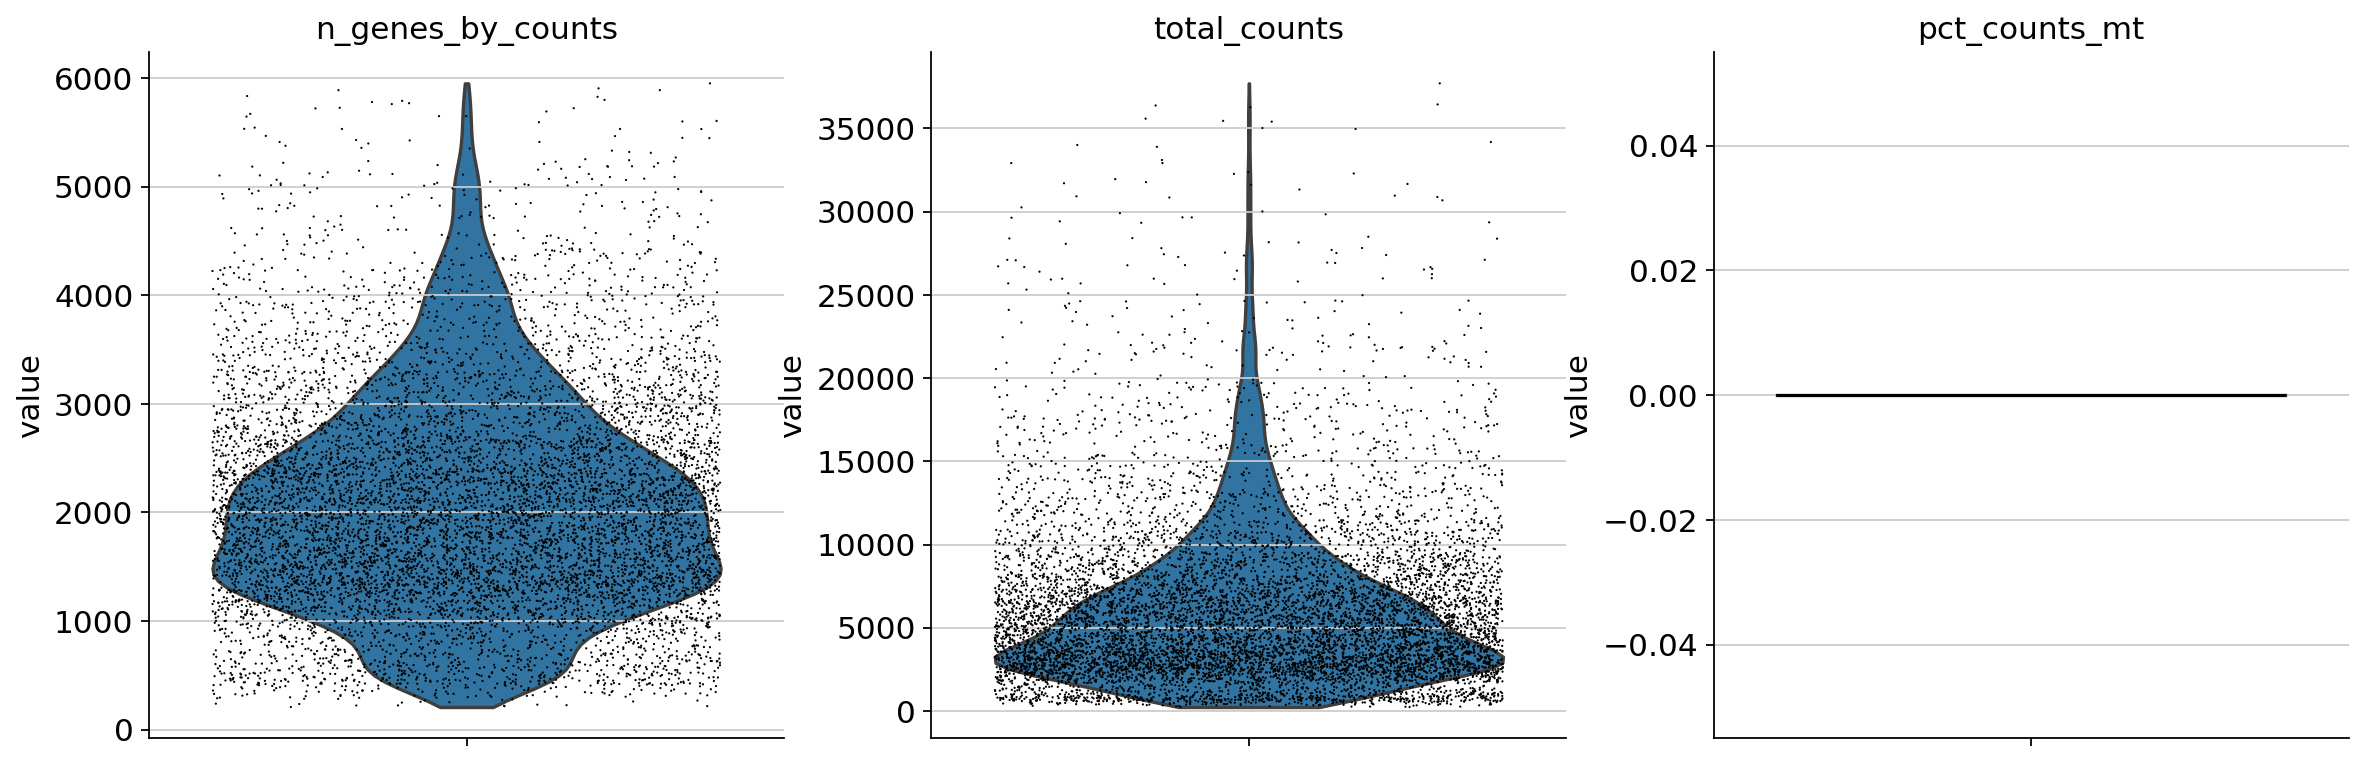

In [ ]:
scRNA_seq.var_names_make_unique()
sc.pl.violin(scRNA_seq, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

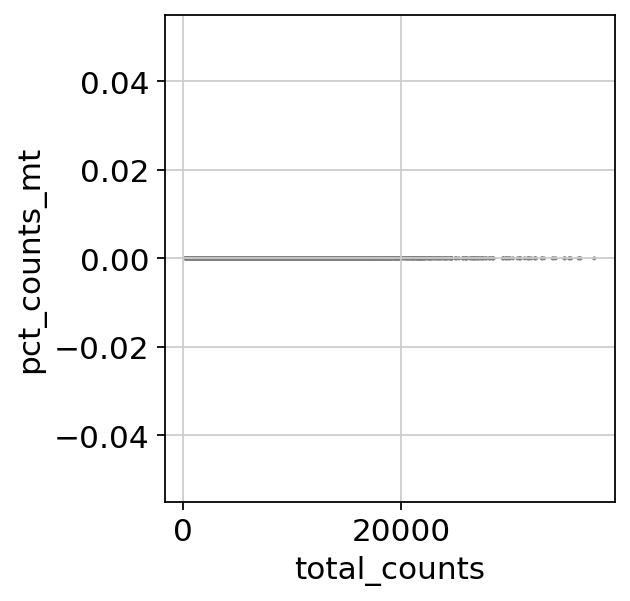

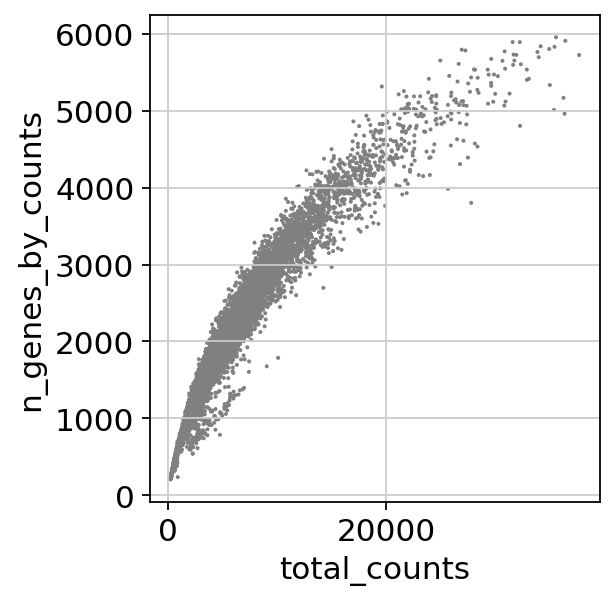

In [ ]:
sc.pl.scatter(scRNA_seq, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(scRNA_seq, x='total_counts', y='n_genes_by_counts')

In [ ]:
scRNA_seq = scRNA_seq[scRNA_seq.obs.pct_counts_mt < 20, :]

In [ ]:
sc.pp.normalize_total(scRNA_seq, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [ ]:
sc.pp.log1p(scRNA_seq)
scRNA_seq

AnnData object with n_obs × n_vars = 9207 × 19488
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'domain', 'leiden_anno', 'CellTypes', 'delli', 'sample'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [ ]:
!pip install scikit-misc

     |████████████████████████████████| 8.8 MB 4.5 MB/s 


In [ ]:
sc.pp.highly_variable_genes(scRNA_seq,flavor='seurat_v3',n_top_genes=3000)
scRNA_seq

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


AnnData object with n_obs × n_vars = 9207 × 19488
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'domain', 'leiden_anno', 'CellTypes', 'delli', 'sample'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg'

In [ ]:
scRNA_seq.raw = scRNA_seq

In [ ]:
scRNA_seq = scRNA_seq[:, scRNA_seq.var.highly_variable]
scRNA_seq

View of AnnData object with n_obs × n_vars = 9207 × 3000
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'domain', 'leiden_anno', 'CellTypes', 'delli', 'sample'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg'

In [ ]:
scRNA_seq.X.sum(axis=0).min()

1.5607212

# scATAC_seq Data Preprocess Normalized

In [ ]:
#!wget ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_31/gencode.v31.chr_patch_hapl_scaff.annotation.gtf.gz
!wget ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz
#!wget ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_38/gencode.v38.annotation.gtf.gz

--2022-04-30 05:37:40--  ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz
           => ‘gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/gencode/Gencode_mouse/release_M25 ... done.
==> SIZE gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz ... 28867067
==> PASV ... done.    ==> RETR gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz ... done.
Length: 28867067 (28M) (unauthoritative)

gencode.vM25.chr_pa 100%[===================>]  27.53M  19.0MB/s    in 1.4s    

2022-04-30 05:37:42 (19.0 MB/s) - ‘gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz’ saved [28867067]



In [ ]:
!gunzip /content/gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz

In [ ]:
pair = pd.read_csv('/content/drive/MyDrive/MI/new_pair.csv')
pair.drop(['Unnamed: 0'],axis=1,inplace=True)
pair['sample']=pair.index
pair

,scRNA,scATAC,sample
0,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,0
1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,1
2,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,2
3,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,3
4,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,4
...,...,...,...
9202,P8_3Sham_TGTTCCGCACACTGCG-1,AAACTCGAGGGATCCA-4,9202
9203,P8_3Sham_CAGGTGCTCATGCATG-1,AGATTCGAGTATACCC-4,9203
9204,P8_3Sham_CGTGAGCCATGGTTGT-1,TCTAGTTAGACCATAA-4,9204
9205,P8_3Sham_GTAGGCCCATCTCCCA-1,GTCACGGTCACAAGCT-4,9205


In [ ]:
new_name=[]
for i in range(len(pair)):
  k='cell_{0}'.format(i)
  new_name.append(k)
pair['sample']=new_name
pair

,scRNA,scATAC,sample
0,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,cell_0
1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,cell_1
2,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,cell_2
3,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,cell_3
4,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,cell_4
...,...,...,...
9202,P8_3Sham_TGTTCCGCACACTGCG-1,AAACTCGAGGGATCCA-4,cell_9202
9203,P8_3Sham_CAGGTGCTCATGCATG-1,AGATTCGAGTATACCC-4,cell_9203
9204,P8_3Sham_CGTGAGCCATGGTTGT-1,TCTAGTTAGACCATAA-4,cell_9204
9205,P8_3Sham_GTAGGCCCATCTCCCA-1,GTCACGGTCACAAGCT-4,cell_9205


In [ ]:
scRNA_seq.obs['sample']=pair['sample'].values
scATAC_seq.obs['sample']=pair['sample'].values
scATAC_seq.obs['CellTypes']=scRNA_seq.obs['CellTypes'].values

In [ ]:
epi.tl.find_genes(scATAC_seq,
           gtf_file='gencode.vM25.chr_patch_hapl_scaff.annotation.gtf',
           key_added='transcript_annotation',
           upstream=2000,
           feature_type='transcript',
           annotation='HAVANA',
           raw=False)

In [ ]:
epi.pp.filter_cells(scATAC_seq, min_features=1)
epi.pp.filter_features(scATAC_seq, min_cells=1)
scATAC_seq

filtered out 344 genes that are detected in less than 1 cells


AnnData object with n_obs × n_vars = 9207 × 117912
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features', 'delli', 'sample', 'CellTypes', 'domain'
    var: 'transcript_annotation', 'n_cells'
    uns: 'omic'

In [ ]:
scATAC_seq

AnnData object with n_obs × n_vars = 9207 × 117912
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features', 'delli', 'sample', 'CellTypes', 'domain'
    var: 'transcript_annotation', 'n_cells'
    uns: 'omic'

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3
import matplotlib

Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.1.3
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scan

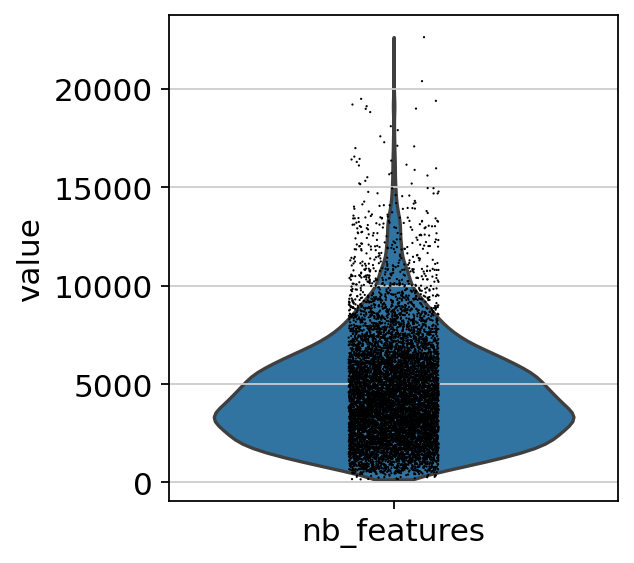

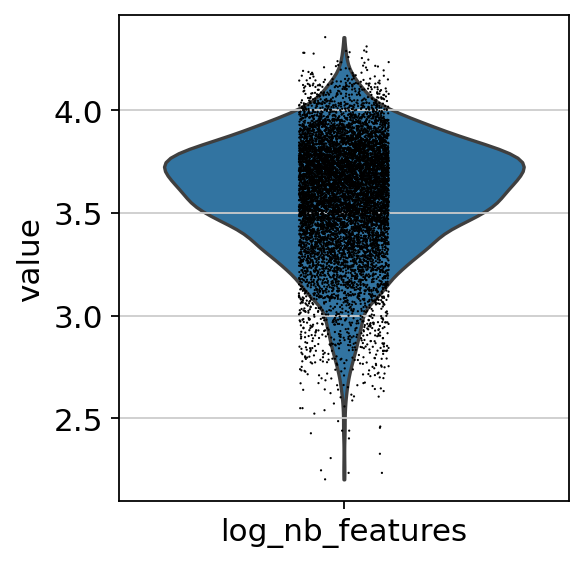

In [ ]:
epi.pl.violin(scATAC_seq, ['nb_features'])
epi.pl.violin(scATAC_seq, ['log_nb_features'])

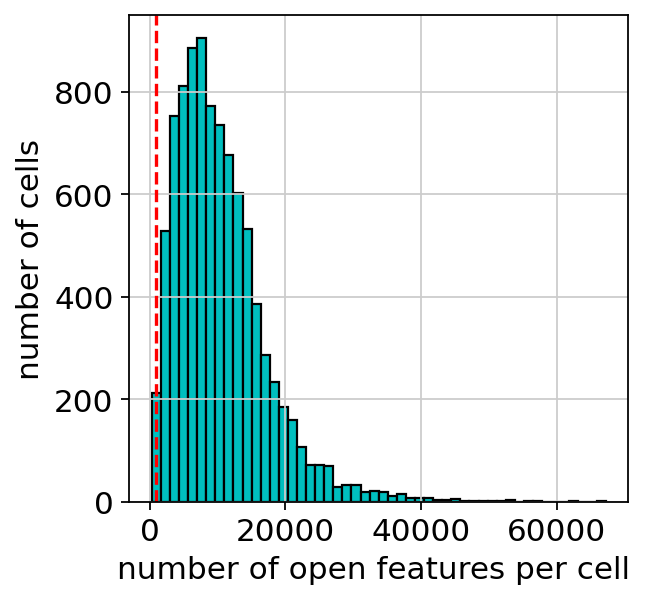

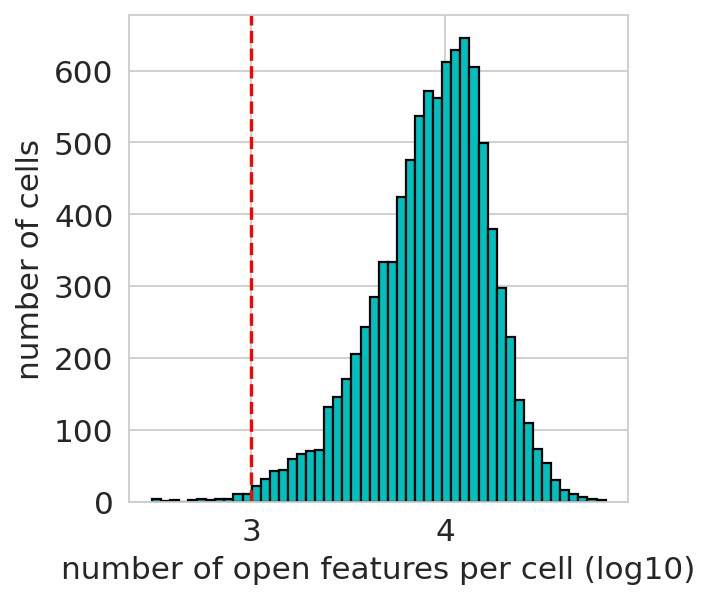

In [ ]:
# set a minimum number of cells to keep 
min_features = 1000

epi.pp.coverage_cells(scATAC_seq, binary=True, log=False, bins=50,
               threshold=min_features, save='Buenrostro_bulk_peaks_coverage_cells.png')
epi.pp.coverage_cells(scATAC_seq, binary=True, log=10, bins=50,
               threshold=min_features, save='Buenrostro_bulk_peaks_coverage_cells_log10.png')

In [ ]:
scATAC_seq

AnnData object with n_obs × n_vars = 9207 × 117912
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features', 'delli', 'sample', 'CellTypes', 'domain'
    var: 'transcript_annotation', 'n_cells'
    uns: 'omic'

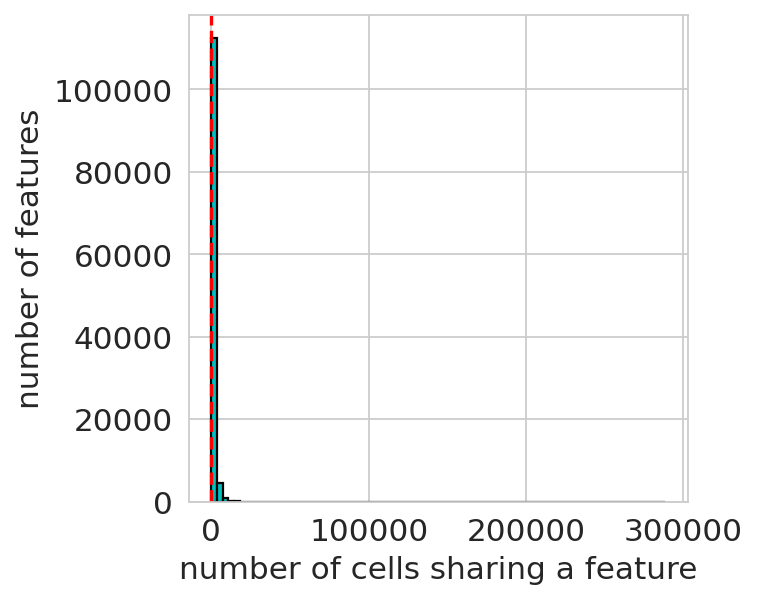

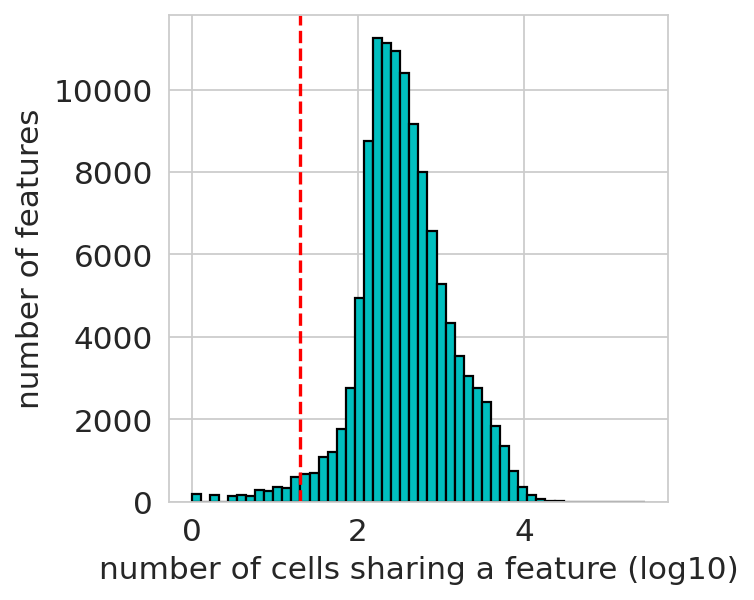

In [ ]:
# minimum number of cells sharing a feature
min_cells = 20
epi.pp.coverage_features(scATAC_seq, binary=True, log=False, 
                        threshold=min_cells, save='Buenrostro_bulk_peaks_coverage_peaks.png')
epi.pp.coverage_features(scATAC_seq, binary=True, log=True, 
                        threshold=min_cells, save='Buenrostro_bulk_peaks_coverage_peaks_log10.png')

In [ ]:

min_cells = 20
epi.pp.filter_features(scATAC_seq, min_cells=min_cells)

filtered out 2635 genes that are detected in less than 20 cells


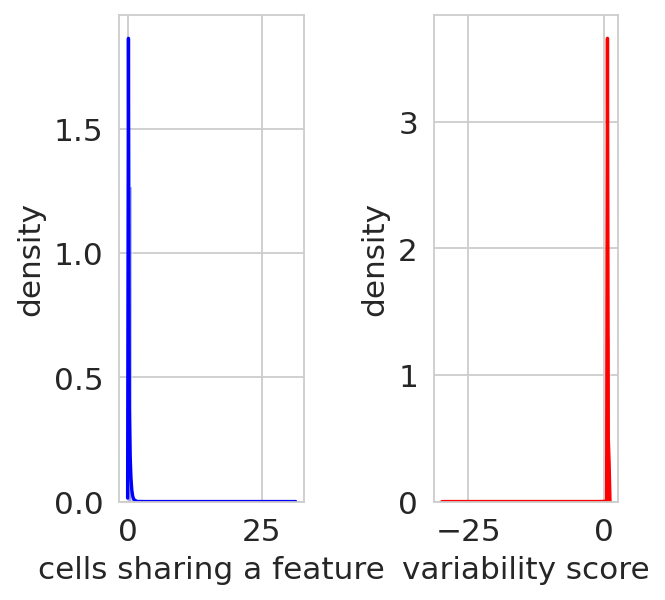

In [ ]:
epi.pp.cal_var(scATAC_seq)

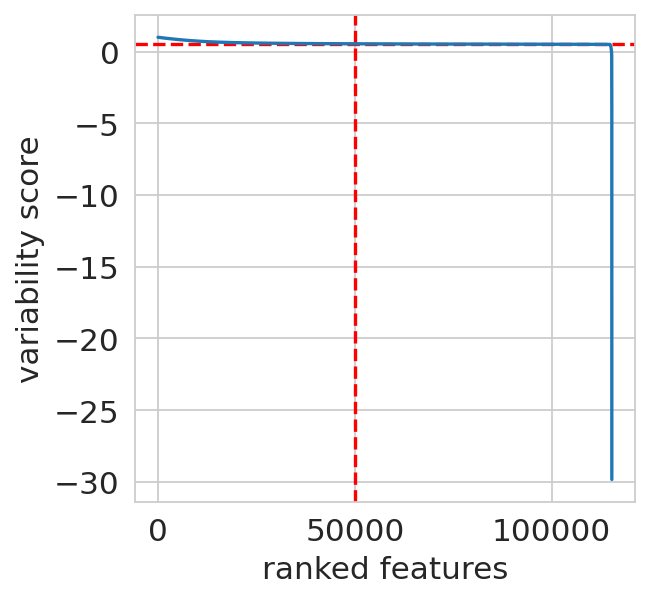

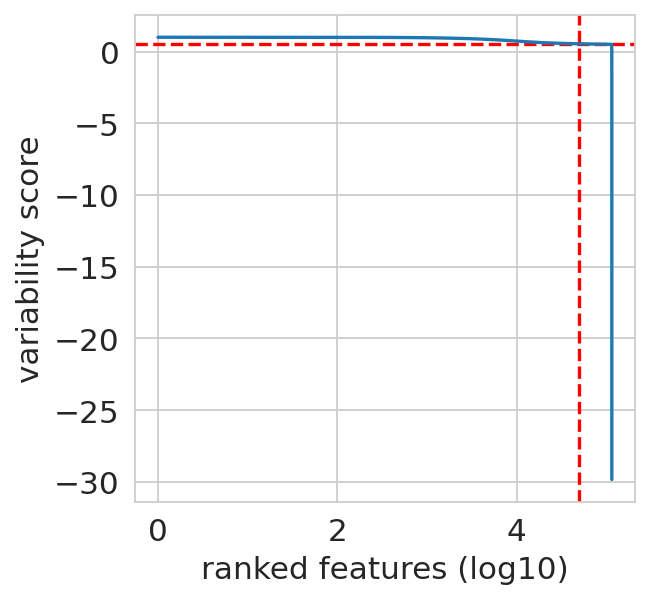

In [ ]:
min_score_value = 0.515
nb_feature_selected = 50000
epi.pl.variability_features(scATAC_seq,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_bonemarrow_peakmatrix.png')

epi.pl.variability_features(scATAC_seq,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_bonemarrow_peakmatrix_log10.png')

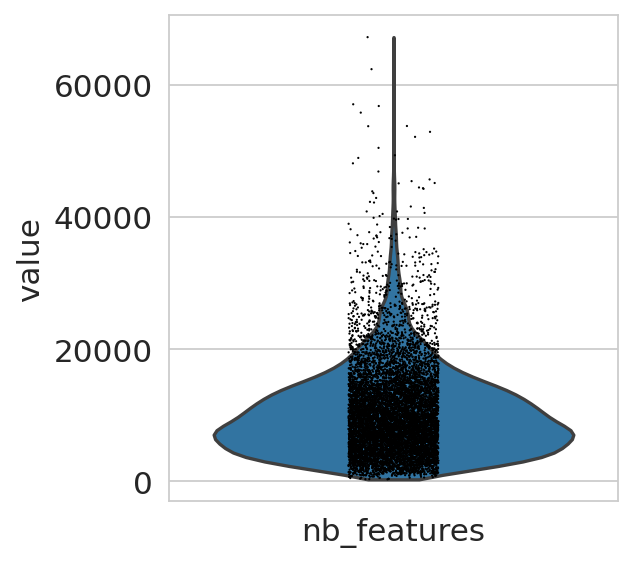

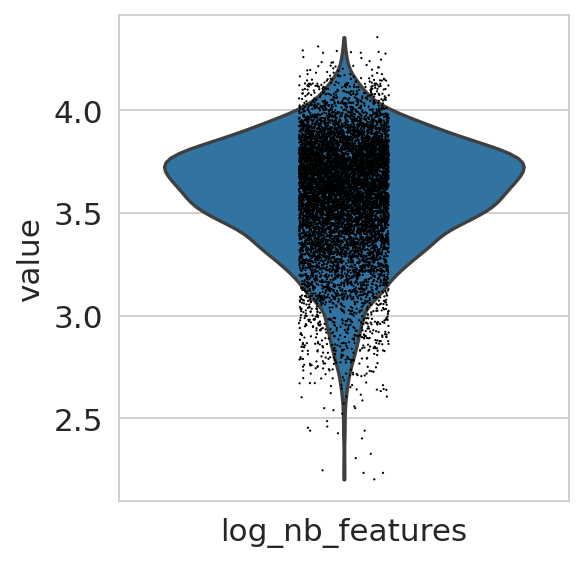

In [ ]:
scATAC_seq.raw=scATAC_seq
# create a new AnnData containing only the most variable features
scATAC_seq = epi.pp.select_var_feature(scATAC_seq,nb_features=nb_feature_selected,show=False,copy=True)
epi.pl.violin(scATAC_seq, ['nb_features'])
epi.pl.violin(scATAC_seq, ['log_nb_features'])

computing PCA
    with n_comps=50
    finished (0:00:53)
computing neighbors
    using 'X_pca' with n_pcs = 50


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:23)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:57)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:29)


TypeError: ignored

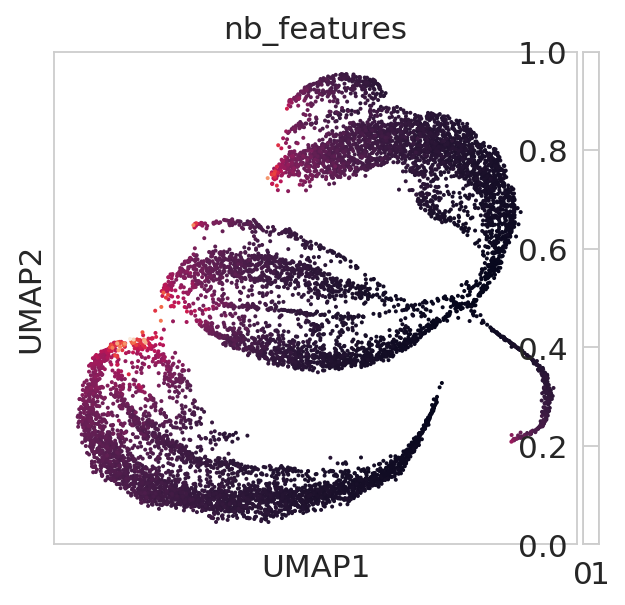

In [ ]:
epi.pp.lazy(scATAC_seq)
sc.pl.umap(scATAC_seq, color=['nb_features', 'CellTypes'], wspace=0.3)

In [ ]:
# save the current version of the matrix (binary, not normalised) in a layer of the Anndata.
scATAC_seq.layers['binary'] = scATAC_seq.X.copy()

In [ ]:
epi.pp.normalize_total(scATAC_seq)

normalizing counts per cell
    finished (0:00:00)


In [ ]:
# save the current version of the matrix (normalised) in a layer of the Anndata.
scATAC_seq.layers['normalised'] = scATAC_seq.X.copy()

In [ ]:
scATAC_seq[1,].X.todense()

matrix([[1.9904606, 0.       , 0.       , ..., 0.       , 0.       ,
         1.9904606]], dtype=float32)

In [ ]:
ret=list(set(scRNA_seq.obs['sample']) & set(scATAC_seq.obs['sample']))
len(ret)

9207

In [ ]:
scRNA_seq=scRNA_seq[scRNA_seq.obs['sample'].isin(ret)]
scATAC_seq=scATAC_seq[scATAC_seq.obs['sample'].isin(ret)]

In [ ]:
scRNA_seq.write_h5ad('scRNA_seq_MOFA_normalized.h5ad',compression="gzip")
!cp /content/scRNA_seq_MOFA_normalized.h5ad /content/drive/MyDrive/MI/
scATAC_seq.write_h5ad('scATAC_seq_MOFA_normalized.h5ad',compression="gzip")
!cp /content/scATAC_seq_MOFA_normalized.h5ad /content/drive/MyDrive/MI/

# Enhancer & Promoter Normaliazed

In [ ]:
Enhancer = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Enhancer.h5ad")
Promoter = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Promoter.h5ad")

In [ ]:
Enhancer_var = Enhancer.var
Enhancer_var

,transcript_annotation,n_cells,commonness,prop_shared_cells,variability_score,list,chr,chromStart,chromEnd
chr1_21068395_21069260,Tram2,634.0,634.0,0.068861,0.568861,chr1_21068395_21069260,chr1,21068395,21069260
chr1_21829650_21830643,Kcnq5,1512.0,1512.0,0.164223,0.664223,chr1_21829650_21830643,chr1,21829650,21830643
chr1_23279681_23280412,intergenic,1573.0,1573.0,0.170848,0.670848,chr1_23279681_23280412,chr1,23279681,23280412
chr1_23286670_23287199,intergenic,737.0,737.0,0.080048,0.580048,chr1_23286670_23287199,chr1,23286670,23287199
chr1_33813486_33815012,Zfp451,2967.0,2967.0,0.322255,0.822255,chr1_33813486_33815012,chr1,33813486,33815012
...,...,...,...,...,...,...,...,...,...
chrX_12857930_12859117,intergenic,847.0,847.0,0.091995,0.591995,chrX_12857930_12859117,chrX,12857930,12859117
chrX_20424975_20426556,Jade3,3294.0,3294.0,0.357771,0.857771,chrX_20424975_20426556,chrX,20424975,20426556
chrX_50566309_50566868,Firre,443.0,443.0,0.048116,0.548116,chrX_50566309_50566868,chrX,50566309,50566868
chrX_99216537_99217428,intergenic,740.0,740.0,0.080374,0.580374,chrX_99216537_99217428,chrX,99216537,99217428


In [ ]:
Enhancer = scATAC_seq[:,Enhancer_var.index]
Enhancer

View of AnnData object with n_obs × n_vars = 9207 × 3451
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features', 'delli', 'sample', 'CellTypes', 'domain'
    var: 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'omic', 'pca', 'neighbors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'normalised'
    obsp: 'distances', 'connectivities'

In [ ]:
Promoter_var = Promoter.var
Promoter = scATAC_seq[:,Promoter_var.index]
Promoter

View of AnnData object with n_obs × n_vars = 9207 × 3963
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features', 'delli', 'sample', 'CellTypes', 'domain'
    var: 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'omic', 'pca', 'neighbors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'normalised'
    obsp: 'distances', 'connectivities'

In [ ]:
Promoter.write_h5ad('scATAC_seq_Promoter_normalized.h5ad',compression='gzip')
!cp /content/scATAC_seq_Promoter_normalized.h5ad /content/drive/MyDrive/MI
Enhancer.write_h5ad('scATAC_seq_Enhancer_normalized.h5ad',compression='gzip')
!cp /content/scATAC_seq_Enhancer_normalized.h5ad /content/drive/MyDrive/MI

# MOFA ALL Normalized

In [ ]:
!pip install scanpy
!pip install mofapy2
from mofapy2.run.entry_point import entry_point
import anndata
import networkx as nx
import scanpy as sc
#import scglue
from matplotlib import rcParams
import pandas as pd
import numpy as np

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
!pip install matplotlib==3.5
!pip install scglue
!pip install scanpy
import matplotlib
import scanpy

In [ ]:
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq_MOFA_normalized.h5ad")
scATAC_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_MOFA_normalized.h5ad")
scEnhancer = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Enhancer_normalized.h5ad")
scPromoter = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Promoter_normalized.h5ad")

In [ ]:
scRNA_seq.obs

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType
P1_3MI_AAACCTGGTAGCGATG-1,pos,MI,3days,P1+3 dpi,1902,1902,5401.0,0.0,0.0,5,scRNA-seq,Endothelial cell,Endothelial cell,tr,cell_0,Endothelial cell
P1_3MI_AAACCTGGTTCGCGAC-1,pos,MI,3days,P1+3 dpi,3560,3560,13569.0,0.0,0.0,8,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_1,Endothelial cell
P1_3MI_AAACCTGTCGTAGATC-1,pos,MI,3days,P1+3 dpi,3133,3133,11937.0,0.0,0.0,0,scRNA-seq,Fibroblast,Fibroblast,tr,cell_2,Fibroblast
P1_3MI_AAACCTGTCTTGTTTG-1,pos,MI,3days,P1+3 dpi,3007,3007,10110.0,0.0,0.0,0,scRNA-seq,Fibroblast,Fibroblast,tr,cell_3,Fibroblast
P1_3MI_AAACGGGCAAGCTGGA-1,pos,MI,3days,P1+3 dpi,3332,3331,11707.0,0.0,0.0,9,scRNA-seq,Endothelial cell-2,Endothelial cell,tr,cell_4,Endothelial cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8_3Sham_TTTGCGCAGAGCCTAG-1,neg,Sham,3days,P8+3 dps,424,424,694.0,0.0,0.0,8,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_9202,Endothelial cell
P8_3Sham_TTTGCGCAGGGTTCCC-1,neg,Sham,3days,P8+3 dps,991,991,1781.0,0.0,0.0,1,scRNA-seq,Smooth Muscle cells,Smooth Muscle cell,tr,cell_9203,Smooth Muscle cell
P8_3Sham_TTTGCGCTCATTTGGG-1,neg,Sham,3days,P8+3 dps,483,483,698.0,0.0,0.0,7,scRNA-seq,Smooth Muscle cells-1,Smooth Muscle cell,tr,cell_9204,Smooth Muscle cell
P8_3Sham_TTTGGTTTCCGTAGTA-1,neg,Sham,3days,P8+3 dps,449,449,654.0,0.0,0.0,7,scRNA-seq,Smooth Muscle cells-1,Smooth Muscle cell,tr,cell_9205,Smooth Muscle cell


In [ ]:
scATAC_seq.obs['CellType']=''
scATAC_seq.obs.loc[scATAC_seq.obs['CellTypes'].str.contains('Cardiomyocyte'),'CellType']='Cardiomyocyte'
scATAC_seq.obs.loc[scATAC_seq.obs['CellTypes'].str.contains('Endothelial cell'),'CellType']='Endothelial cell'
scATAC_seq.obs.loc[scATAC_seq.obs['CellTypes'].str.contains('Smooth Muscle cells'),'CellType']='Smooth Muscle cell'
scATAC_seq.obs.loc[scATAC_seq.obs['CellTypes'].str.contains('Fibroblast'),'CellType']='Fibroblast'
scATAC_seq.obs.loc[scATAC_seq.obs['CellTypes'].str.contains('Pericytes'),'CellType']='Pericytes'
scATAC_seq.obs.loc[scATAC_seq.obs['CellTypes'].str.contains('Macrophage'),'CellType']='Macrophage'
scATAC_seq.obs.loc[scATAC_seq.obs['CellTypes'].str.contains('Granulocytes'),'CellType']='Granulocytes'
scATAC_seq.obs['CellTypes']=scATAC_seq.obs['CellType']
scATAC_seq.obs

,Type,Stem_Cell_Property,Myocardial_infarction,nb_features,log_nb_features,delli,sample,CellTypes,domain,CellType
AAACGAAAGGATGTCG-1,P1+3 dpi,pos,MI,13472.0,3.757851,tr,cell_0,,scATAC-seq,
AAACGAAAGTAACTCC-1,P1+3 dpi,pos,MI,9145.0,3.623559,tr,cell_1,,scATAC-seq,
AAACGAACACTTACAG-1,P1+3 dpi,pos,MI,20611.0,3.949488,tr,cell_2,Fibroblast,scATAC-seq,Fibroblast
AAACGAACATATACGC-1,P1+3 dpi,pos,MI,16051.0,3.860937,tr,cell_3,Fibroblast,scATAC-seq,Fibroblast
AAACGAAGTATTCTGG-1,P1+3 dpi,pos,MI,11284.0,3.724194,tr,cell_4,,scATAC-seq,
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTCGCGTT-4,P8+3 dps,neg,Sham,10525.0,3.652633,tr,cell_9202,,scATAC-seq,
TTTGGTTTCTTACGGA-4,P8+3 dps,neg,Sham,5865.0,3.427648,tr,cell_9203,,scATAC-seq,
TTTGTGTCAAGGCGTA-4,P8+3 dps,neg,Sham,1207.0,2.772322,tr,cell_9204,,scATAC-seq,
TTTGTGTCAATCACTG-4,P8+3 dps,neg,Sham,8727.0,3.595827,tr,cell_9205,,scATAC-seq,


In [ ]:
scEnhancer.obs['CellType']=''
scEnhancer.obs.loc[scEnhancer.obs['CellTypes'].str.contains('Cardiomyocyte'),'CellType']='Cardiomyocyte'
scEnhancer.obs.loc[scEnhancer.obs['CellTypes'].str.contains('Endothelial cell'),'CellType']='Endothelial cell'
scEnhancer.obs.loc[scEnhancer.obs['CellTypes'].str.contains('Smooth Muscle cells'),'CellType']='Smooth Muscle cell'
scEnhancer.obs.loc[scEnhancer.obs['CellTypes'].str.contains('Fibroblast'),'CellType']='Fibroblast'
scEnhancer.obs.loc[scEnhancer.obs['CellTypes'].str.contains('Pericytes'),'CellType']='Pericytes'
scEnhancer.obs.loc[scEnhancer.obs['CellTypes'].str.contains('Macrophage'),'CellType']='Macrophage'
scEnhancer.obs.loc[scEnhancer.obs['CellTypes'].str.contains('Granulocytes'),'CellType']='Granulocytes'
scEnhancer.obs['CellTypes']=scEnhancer.obs['CellType']
scEnhancer.obs

,Type,Stem_Cell_Property,Myocardial_infarction,nb_features,log_nb_features,delli,sample,CellTypes,domain,CellType
AAACGAAAGGATGTCG-1,P1+3 dpi,pos,MI,13472.0,3.757851,tr,cell_0,,scATAC-seq,
AAACGAAAGTAACTCC-1,P1+3 dpi,pos,MI,9145.0,3.623559,tr,cell_1,,scATAC-seq,
AAACGAACACTTACAG-1,P1+3 dpi,pos,MI,20611.0,3.949488,tr,cell_2,,scATAC-seq,
AAACGAACATATACGC-1,P1+3 dpi,pos,MI,16051.0,3.860937,tr,cell_3,,scATAC-seq,
AAACGAAGTATTCTGG-1,P1+3 dpi,pos,MI,11284.0,3.724194,tr,cell_4,,scATAC-seq,
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTCGCGTT-4,P8+3 dps,neg,Sham,10525.0,3.652633,tr,cell_9202,,scATAC-seq,
TTTGGTTTCTTACGGA-4,P8+3 dps,neg,Sham,5865.0,3.427648,tr,cell_9203,,scATAC-seq,
TTTGTGTCAAGGCGTA-4,P8+3 dps,neg,Sham,1207.0,2.772322,tr,cell_9204,,scATAC-seq,
TTTGTGTCAATCACTG-4,P8+3 dps,neg,Sham,8727.0,3.595827,tr,cell_9205,,scATAC-seq,


In [ ]:
scPromoter.obs['CellType']=''
scPromoter.obs.loc[scPromoter.obs['CellTypes'].str.contains('Cardiomyocyte'),'CellType']='Cardiomyocyte'
scPromoter.obs.loc[scPromoter.obs['CellTypes'].str.contains('Endothelial cell'),'CellType']='Endothelial cell'
scPromoter.obs.loc[scPromoter.obs['CellTypes'].str.contains('Smooth Muscle cells'),'CellType']='Smooth Muscle cell'
scPromoter.obs.loc[scPromoter.obs['CellTypes'].str.contains('Fibroblast'),'CellType']='Fibroblast'
scPromoter.obs.loc[scPromoter.obs['CellTypes'].str.contains('Pericytes'),'CellType']='Pericytes'
scPromoter.obs.loc[scPromoter.obs['CellTypes'].str.contains('Macrophage'),'CellType']='Macrophage'
scPromoter.obs.loc[scPromoter.obs['CellTypes'].str.contains('Granulocytes'),'CellType']='Granulocytes'
scPromoter.obs['CellTypes']=scPromoter.obs['CellType']
scPromoter.obs

,Type,Stem_Cell_Property,Myocardial_infarction,nb_features,log_nb_features,delli,sample,CellTypes,domain,CellType
AAACGAAAGGATGTCG-1,P1+3 dpi,pos,MI,13472.0,3.757851,tr,cell_0,,scATAC-seq,
AAACGAAAGTAACTCC-1,P1+3 dpi,pos,MI,9145.0,3.623559,tr,cell_1,,scATAC-seq,
AAACGAACACTTACAG-1,P1+3 dpi,pos,MI,20611.0,3.949488,tr,cell_2,,scATAC-seq,
AAACGAACATATACGC-1,P1+3 dpi,pos,MI,16051.0,3.860937,tr,cell_3,,scATAC-seq,
AAACGAAGTATTCTGG-1,P1+3 dpi,pos,MI,11284.0,3.724194,tr,cell_4,,scATAC-seq,
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTCGCGTT-4,P8+3 dps,neg,Sham,10525.0,3.652633,tr,cell_9202,,scATAC-seq,
TTTGGTTTCTTACGGA-4,P8+3 dps,neg,Sham,5865.0,3.427648,tr,cell_9203,,scATAC-seq,
TTTGTGTCAAGGCGTA-4,P8+3 dps,neg,Sham,1207.0,2.772322,tr,cell_9204,,scATAC-seq,
TTTGTGTCAATCACTG-4,P8+3 dps,neg,Sham,8727.0,3.595827,tr,cell_9205,,scATAC-seq,


In [ ]:
scRNA_seq.obs['CellType']=''
scRNA_seq.obs['CellTypes']=scRNA_seq.obs['leiden_anno']
scRNA_seq.obs.loc[scRNA_seq.obs['CellTypes'].str.contains('Cardiomyocyte'),'CellType']='Cardiomyocyte'
scRNA_seq.obs.loc[scRNA_seq.obs['CellTypes'].str.contains('Endothelial cell'),'CellType']='Endothelial cell'
scRNA_seq.obs.loc[scRNA_seq.obs['CellTypes'].str.contains('Smooth Muscle cells'),'CellType']='Smooth Muscle cell'
scRNA_seq.obs.loc[scRNA_seq.obs['CellTypes'].str.contains('Fibroblast'),'CellType']='Fibroblast'
scRNA_seq.obs.loc[scRNA_seq.obs['CellTypes'].str.contains('Pericytes'),'CellType']='Pericytes'
scRNA_seq.obs.loc[scRNA_seq.obs['CellTypes'].str.contains('Macrophage'),'CellType']='Macrophage'
scRNA_seq.obs.loc[scRNA_seq.obs['CellTypes'].str.contains('Granulocytes'),'CellType']='Granulocytes'
scRNA_seq.obs['CellTypes']=scRNA_seq.obs['CellType']
scRNA_seq.obs

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType
P1_3MI_AAACCTGGTAGCGATG-1,pos,MI,3days,P1+3 dpi,1902,1902,5401.0,0.0,0.0,5,scRNA-seq,Endothelial cell,Endothelial cell,tr,cell_0,Endothelial cell
P1_3MI_AAACCTGGTTCGCGAC-1,pos,MI,3days,P1+3 dpi,3560,3560,13569.0,0.0,0.0,8,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_1,Endothelial cell
P1_3MI_AAACCTGTCGTAGATC-1,pos,MI,3days,P1+3 dpi,3133,3133,11937.0,0.0,0.0,0,scRNA-seq,Fibroblast,Fibroblast,tr,cell_2,Fibroblast
P1_3MI_AAACCTGTCTTGTTTG-1,pos,MI,3days,P1+3 dpi,3007,3007,10110.0,0.0,0.0,0,scRNA-seq,Fibroblast,Fibroblast,tr,cell_3,Fibroblast
P1_3MI_AAACGGGCAAGCTGGA-1,pos,MI,3days,P1+3 dpi,3332,3331,11707.0,0.0,0.0,9,scRNA-seq,Endothelial cell-2,Endothelial cell,tr,cell_4,Endothelial cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8_3Sham_TTTGCGCAGAGCCTAG-1,neg,Sham,3days,P8+3 dps,424,424,694.0,0.0,0.0,8,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_9202,Endothelial cell
P8_3Sham_TTTGCGCAGGGTTCCC-1,neg,Sham,3days,P8+3 dps,991,991,1781.0,0.0,0.0,1,scRNA-seq,Smooth Muscle cells,Smooth Muscle cell,tr,cell_9203,Smooth Muscle cell
P8_3Sham_TTTGCGCTCATTTGGG-1,neg,Sham,3days,P8+3 dps,483,483,698.0,0.0,0.0,7,scRNA-seq,Smooth Muscle cells-1,Smooth Muscle cell,tr,cell_9204,Smooth Muscle cell
P8_3Sham_TTTGGTTTCCGTAGTA-1,neg,Sham,3days,P8+3 dps,449,449,654.0,0.0,0.0,7,scRNA-seq,Smooth Muscle cells-1,Smooth Muscle cell,tr,cell_9205,Smooth Muscle cell


In [ ]:
scATAC_seq.write_h5ad('/content/drive/MyDrive/MI/scATAC_seq_MOFA_normalized.h5ad',compression='gzip')
scEnhancer.write_h5ad('/content/drive/MyDrive/MI/scATAC_seq_Enhancer_normalized.h5ad',compression='gzip')
scPromoter.write_h5ad('/content/drive/MyDrive/MI/scATAC_seq_Promoter_normalized.h5ad',compression='gzip')
scRNA_seq.write_h5ad('/content/drive/MyDrive/MI/scRNA_seq_MOFA_normalized.h5ad',compression='gzip')

In [ ]:
rna_MOFA_meta=scRNA_seq.obs.copy()
rna_MOFA_meta['CellTypes']=[i.split('-')[0] for i in rna_MOFA_meta['CellTypes']]
rna_MOFA_meta.set_index(scPromoter.obs.index,inplace=True)
rna_MOFA_meta.index.name='sample'
rna_MOFA_meta.to_csv('rna_MOFA_meta_merge_normalized.csv')
rna_MOFA_meta.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType
sample,,,,,,,,,,,,,,,,
AAACGAAAGGATGTCG-1,pos,MI,3days,P1+3 dpi,1902,1902,5401.0,0.0,0.0,5,scRNA-seq,Endothelial cell,Endothelial cell,tr,cell_0,Endothelial cell
AAACGAAAGTAACTCC-1,pos,MI,3days,P1+3 dpi,3560,3560,13569.0,0.0,0.0,8,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_1,Endothelial cell
AAACGAACACTTACAG-1,pos,MI,3days,P1+3 dpi,3133,3133,11937.0,0.0,0.0,0,scRNA-seq,Fibroblast,Fibroblast,tr,cell_2,Fibroblast
AAACGAACATATACGC-1,pos,MI,3days,P1+3 dpi,3007,3007,10110.0,0.0,0.0,0,scRNA-seq,Fibroblast,Fibroblast,tr,cell_3,Fibroblast
AAACGAAGTATTCTGG-1,pos,MI,3days,P1+3 dpi,3332,3331,11707.0,0.0,0.0,9,scRNA-seq,Endothelial cell-2,Endothelial cell,tr,cell_4,Endothelial cell


In [ ]:
rna_MOFA = scRNA_seq
Enhancer_MOFA = scEnhancer
Promoter_MOFA = scPromoter

In [ ]:
# initialise the entry point
# MOFA参数设置
ent1 = entry_point()
ent1.set_data_options(
    scale_groups = False, 
    scale_views = False,
    center_groups=True,
)
# 构建组学层
data_mat=[[None for g in range(1)] for m in range(3)]
data_mat[0][0]=np.array(rna_MOFA.X.todense())
data_mat[1][0]=np.array(Enhancer_MOFA.X.todense())
data_mat[2][0]=np.array(Promoter_MOFA.X.todense())
# MOFA-Enhancer,Gene_Activity_ASC数据预处理，防止feature_names重复
Enhancer_MOFA_All=[]
for i in scEnhancer.var_names:
  Enhancer_MOFA_All.append('Enhancer_'+i)
Enhancer_MOFA_All

Promoter_MOFA_All=[]
for i in scPromoter.var_names:
  Promoter_MOFA_All.append('Promoter_'+i)
Promoter_MOFA_All

# MOFA数据导入
ent1.set_data_matrix(data_mat, likelihoods = ["gaussian","gaussian","gaussian"],
          views_names=['RNA','Enhancer','Promoter'],
          samples_names=[Promoter_MOFA.obs.index],
          features_names=[rna_MOFA.var_names,
                  Enhancer_MOFA_All,
                  Promoter_MOFA_All])
# 模型参数设置
ent1.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)
ent1.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = True, 
    verbose = False, 
    seed = 1
)
# 模型运行并保存
ent1.build()

ent1.run()

# Save the output
ent1.save(outfile='MOFA_ALL_normalized.hdf5')
!cp MOFA_ALL_normalized.hdf5 /content/drive/MyDrive/MI


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='RNA' group='group0' with N=9207 samples and D=3000 features...
Successfully loaded view='Enhancer' group='group0' with N=9207 samples and D=3451 features...
Successfully loaded view='Promoter' group='group0' with N=9207 samples and D=3963 features...


Model optio

# MOFA P1

In [ ]:
scRNA_seq_P1 = scRNA_seq[scRNA_seq.obs[scRNA_seq.obs['Type'].str.contains('P1')].index,:]
scATAC_seq_P1 = scATAC_seq[scATAC_seq.obs[scATAC_seq.obs['Type'].str.contains('P1')].index,:]
scEnhancer_P1 = scEnhancer[scEnhancer.obs[scEnhancer.obs['Type'].str.contains('P1')].index,:]
scPromoter_P1 = scPromoter[scPromoter.obs[scPromoter.obs['Type'].str.contains('P1')].index,:]

In [ ]:
rna_MOFA = scRNA_seq_P1
Enhancer_MOFA = scEnhancer_P1
Promoter_MOFA = scPromoter_P1

In [ ]:
rna_MOFA_meta=rna_MOFA.obs.copy()
rna_MOFA_meta['CellTypes']=[i.split('-')[0] for i in rna_MOFA_meta['CellTypes']]
rna_MOFA_meta.set_index(Promoter_MOFA.obs.index,inplace=True)
rna_MOFA_meta.index.name='sample'
rna_MOFA_meta.to_csv('MOFA_meta_P1.csv')
rna_MOFA_meta.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType
sample,,,,,,,,,,,,,,,,
AAACGAAAGGATGTCG-1,pos,MI,3days,P1+3 dpi,1902,1902,5401.0,0.0,0.0,5,scRNA-seq,Endothelial cell,Endothelial cell,tr,cell_0,Endothelial cell
AAACGAAAGTAACTCC-1,pos,MI,3days,P1+3 dpi,3560,3560,13569.0,0.0,0.0,8,scRNA-seq,Endothelial cell-1,Endothelial cell,tr,cell_1,Endothelial cell
AAACGAACACTTACAG-1,pos,MI,3days,P1+3 dpi,3133,3133,11937.0,0.0,0.0,0,scRNA-seq,Fibroblast,Fibroblast,tr,cell_2,Fibroblast
AAACGAACATATACGC-1,pos,MI,3days,P1+3 dpi,3007,3007,10110.0,0.0,0.0,0,scRNA-seq,Fibroblast,Fibroblast,tr,cell_3,Fibroblast
AAACGAAGTATTCTGG-1,pos,MI,3days,P1+3 dpi,3332,3331,11707.0,0.0,0.0,9,scRNA-seq,Endothelial cell-2,Endothelial cell,tr,cell_4,Endothelial cell


In [ ]:
# initialise the entry point
# MOFA参数设置
ent1 = entry_point()
ent1.set_data_options(
    scale_groups = False, 
    scale_views = False,
    center_groups=True,
)
# 构建组学层
data_mat=[[None for g in range(1)] for m in range(3)]
data_mat[0][0]=np.array(rna_MOFA.X.todense())
data_mat[1][0]=np.array(Enhancer_MOFA.X.todense())
data_mat[2][0]=np.array(Promoter_MOFA.X.todense())
# MOFA-Enhancer,Gene_Activity_ASC数据预处理，防止feature_names重复

Enhancer_MOFA_pos=[]
for i in scEnhancer_P1.var_names:
  Enhancer_MOFA_pos.append('Enhancer'+i)
Enhancer_MOFA_pos

Promoter_MOFA_pos=[]
for i in scPromoter_P1.var_names:
  Promoter_MOFA_pos.append('Promoter'+i)
Promoter_MOFA_pos

# MOFA数据导入
ent1.set_data_matrix(data_mat, likelihoods = ["gaussian","gaussian","gaussian"],
          views_names=['RNA','Enhancer','Promoter'],
          samples_names=[Promoter_MOFA.obs.index],
          features_names=[rna_MOFA.var_names,
                  Enhancer_MOFA_pos,
                  Promoter_MOFA_pos])
# 模型参数设置
ent1.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)
ent1.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = True, 
    verbose = False, 
    seed = 1
)
# 模型运行并保存
ent1.build()

ent1.run()

# Save the output
ent1.save(outfile='MOFA_P1.hdf5')
!cp MOFA_P1.hdf5 /content/drive/MyDrive/MI


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='RNA' group='group0' with N=6233 samples and D=3000 features...
Successfully loaded view='Enhancer' group='group0' with N=6233 samples and D=3451 features...
Successfully loaded view='Promoter' group='group0' with N=6233 samples and D=3963 features...



Model opti

# MOFA P8

In [ ]:
scRNA_seq_P8 = scRNA_seq[scRNA_seq.obs[scRNA_seq.obs['Type'].str.contains('P8')].index,:]
scATAC_seq_P8 = scATAC_seq[scATAC_seq.obs[scATAC_seq.obs['Type'].str.contains('P8')].index,:]
scEnhancer_P8 = scEnhancer[scEnhancer.obs[scEnhancer.obs['Type'].str.contains('P8')].index,:]
scPromoter_P8 = scPromoter[scPromoter.obs[scPromoter.obs['Type'].str.contains('P8')].index,:]

In [ ]:
rna_MOFA = scRNA_seq_P8
Enhancer_MOFA = scEnhancer_P8
Promoter_MOFA = scPromoter_P8

In [ ]:
rna_MOFA_meta=rna_MOFA.obs.copy()
rna_MOFA_meta['CellTypes']=[i.split('-')[0] for i in rna_MOFA_meta['CellTypes']]
rna_MOFA_meta.set_index(Promoter_MOFA.obs.index,inplace=True)
rna_MOFA_meta.index.name='sample'
rna_MOFA_meta.to_csv('MOFA_meta_P8.csv')
rna_MOFA_meta.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType
sample,,,,,,,,,,,,,,,,
AAACGAAAGGTTCGAG-3,neg,MI,3days,P8+3 dpi,2270,2270,6521.0,0.0,0.0,10,scRNA-seq,Fibroblast-2,Fibroblast,tr,cell_6233,Fibroblast
AAACGAATCAATTGGC-3,neg,MI,3days,P8+3 dpi,4979,4978,24558.0,0.0,0.0,10,scRNA-seq,Fibroblast-2,Fibroblast,tr,cell_6234,Fibroblast
AAACGAATCACATCCC-3,neg,MI,3days,P8+3 dpi,3392,3392,12045.0,0.0,0.0,10,scRNA-seq,Fibroblast-2,Fibroblast,tr,cell_6235,Fibroblast
AAACTCGAGAGGCAGG-3,neg,MI,3days,P8+3 dpi,3104,3101,8537.0,0.0,0.0,12,scRNA-seq,Fibroblast-4,Fibroblast,tr,cell_6236,Fibroblast
AAACTCGCAACGGACA-3,neg,MI,3days,P8+3 dpi,3153,3153,8298.0,0.0,0.0,9,scRNA-seq,Endothelial cell-2,Endothelial cell,tr,cell_6237,Endothelial cell


In [ ]:
# initialise the entry point
# MOFA参数设置
ent1 = entry_point()
ent1.set_data_options(
    scale_groups = False, 
    scale_views = False,
    center_groups=True,
)
# 构建组学层
data_mat=[[None for g in range(1)] for m in range(3)]
data_mat[0][0]=np.array(rna_MOFA.X.todense())
data_mat[1][0]=np.array(Enhancer_MOFA.X.todense())
data_mat[2][0]=np.array(Promoter_MOFA.X.todense())
# MOFA-Enhancer,Gene_Activity_ASC数据预处理，防止feature_names重复

Enhancer_MOFA_pos=[]
for i in scEnhancer_P8.var_names:
  Enhancer_MOFA_pos.append('Enhancer'+i)
Enhancer_MOFA_pos

Promoter_MOFA_pos=[]
for i in scPromoter_P8.var_names:
  Promoter_MOFA_pos.append('Promoter'+i)
Promoter_MOFA_pos

# MOFA数据导入
ent1.set_data_matrix(data_mat, likelihoods = ["gaussian","gaussian","gaussian"],
          views_names=['RNA','Enhancer','Promoter'],
          samples_names=[Promoter_MOFA.obs.index],
          features_names=[rna_MOFA.var_names,
                  Enhancer_MOFA_pos,
                  Promoter_MOFA_pos])
# 模型参数设置
ent1.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)
ent1.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = True, 
    verbose = False, 
    seed = 1
)
# 模型运行并保存
ent1.build()

ent1.run()

# Save the output
ent1.save(outfile='MOFA_P8.hdf5')
!cp MOFA_P8.hdf5 /content/drive/MyDrive/MI


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='RNA' group='group0' with N=2974 samples and D=3000 features...
Successfully loaded view='Enhancer' group='group0' with N=2974 samples and D=3451 features...
Successfully loaded view='Promoter' group='group0' with N=2974 samples and D=3963 features...



Model opti